# Exploratory Data Analysis

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import random 
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
data = pd.read_csv('../dataset/processed/cleaned_data.csv')
data.head()

,Movie_Title,Movie_ID,Budget,Cast,Crew,Studios,Genre,Keywords,Languages,Countries,Release_Data,Runtime,Gross_worldwide,Rating,Rating_Count,ListOfCertificate,Release_Year,Release_Month,Release_Day
0,Star Wars: Episode VII - The Force Awakens,2488496,245000000,"['Daisy Ridley', 'John Boyega', 'Oscar Isaac',...","['Lawrence Kasdan', 'Michael Arndt', 'J.J. Abr...","['Lucasfilm', 'Bad Robot', 'Truenorth Producti...","['Action', 'Adventure', 'Sci-Fi']","['reboot', 'sanitation employee', 'remake', 'c...",['English'],['United States'],2015-12-18,138,2069521700,7.8,893000,['PG-13'],2015,12,18
1,Frozen II,4520988,150000000,"['Kristen Bell', 'Idina Menzel', 'Josh Gad', '...","['Jennifer Lee', 'Hans Christian Andersen', 'C...","['Walt Disney Animation Studios', 'Walt Disney...","['Animation', 'Adventure', 'Comedy', 'Family',...","['autumn', 'anthropomorphic snowman', 'princes...",['English'],['United States'],2019-11-22,103,1450026933,6.8,156000,['PG'],2019,11,22
2,The Dark Knight Rises,1345836,250000000,"['Christian Bale', 'Tom Hardy', 'Anne Hathaway...","['Jonathan Nolan', 'Christopher Nolan', 'David...","['Warner Bros.', 'Legendary Entertainment', 'D...","['Action', 'Crime', 'Drama']","['dc comics', 'batman character', 'bruce wayne...","['English', 'Arabic']","['United Kingdom', 'United States']",2012-07-27,164,1081142612,8.4,1600000,['PG-13'],2012,7,27
3,Beauty and the Beast,2771200,160000000,"['Emma Watson', 'Dan Stevens', 'Luke Evans', '...","['Evan Spiliotopoulos', 'Bill Condon', 'Stephe...","['Mandeville Films', 'Walt Disney Pictures']","['Adventure', 'Family', 'Fantasy', 'Musical', ...","['beast', 'fairy tale', 'heroine', ""beast's he...",['English'],['United States'],2017-03-17,129,1273576220,7.1,293000,['PG'],2017,3,17
4,Finding Dory,2277860,200000000,"['Ellen DeGeneres', 'Albert Brooks', ""Ed O'Nei...","['Angus MacLane', 'Victoria Strouse', 'Andrew ...","['Pixar Animation Studios', 'Walt Disney Pictu...","['Animation', 'Adventure', 'Comedy', 'Family']","['fish', 'ocean', 'whale', 'octopus driving a ...","['English', 'Indonesian']",['United States'],2016-06-17,97,1028570942,7.3,259000,['PG'],2016,6,17


Load multivalued attributes

In [38]:
import ast

cols = ['Cast', 'Genre', 'Studios', 'ListOfCertificate', 'Keywords', 'Languages', 'Countries', 'Crew']
for col in cols:
    data[col] = data[col].apply(ast.literal_eval)

## Multivalued attributes with gross and count

1. Input
- `dataframe`: Dataframe to process
- `col_name`: Name of the column to process, `Cast`, `Genre` and `Studios` for example

2. Output
- Output: Dataframe contains information related to the columns combined with Money and Count

In [39]:
def parseWithMoneyAndCount(dataframe, col_name):
    res = []
    count = []
    gross = []

    for index, record in enumerate(dataframe[col_name]):
        for x in record:
            # Save results to corresponding array
            res.append(x)
            gross.append(dataframe['Gross_worldwide'][index])
            count.append(1)

    # Make dataframe; remove duplicates and sum corresponding columns
    t1 = pd.DataFrame({col_name: res, 'Total': gross, 'Count': count})
    result1 = t1.groupby(col_name).sum()
    result1.reset_index(inplace=True)

    t2 = pd.DataFrame({col_name: res, 'Mean': gross})
    result2 = t2.groupby(col_name).mean()
    result2.reset_index(inplace=True)

    result = result1.merge(result2, on=col_name, how='inner')

    t3 = pd.DataFrame({col_name: res, 'Median': gross})
    result3 = t3.groupby(col_name).median()
    result3.reset_index(inplace=True)

    result = result.merge(result3, on=col_name, how='inner')
    return result

## Brief information about data



In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8752 entries, 0 to 8751
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_Title        8752 non-null   object 
 1   Movie_ID           8752 non-null   int64  
 2   Budget             8752 non-null   int64  
 3   Cast               8752 non-null   object 
 4   Crew               8752 non-null   object 
 5   Studios            8752 non-null   object 
 6   Genre              8752 non-null   object 
 7   Keywords           8752 non-null   object 
 8   Languages          8752 non-null   object 
 9   Countries          8752 non-null   object 
 10  Release_Data       8752 non-null   object 
 11  Runtime            8752 non-null   int64  
 12  Gross_worldwide    8752 non-null   int64  
 13  Rating             8752 non-null   float64
 14  Rating_Count       8752 non-null   int64  
 15  ListOfCertificate  8752 non-null   object 
 16  Release_Year       8752 

In [236]:
data.describe()

,Movie_ID,Budget,Runtime,Gross_worldwide,Rating,Rating_Count,Release_Year,Release_Month,Release_Day
count,8.752000e+03,8.752000e+03,8752.000000,8.752000e+03,8752.000000,8.752000e+03,8752.000000,8752.000000,8752.000000
mean,1.044857e+06,2.351613e+07,107.962751,7.172680e+07,6.430884,8.347387e+04,2000.010398,6.688643,16.042162
std,1.743793e+06,3.713278e+07,19.695128,1.564077e+08,1.005946,1.641414e+05,13.471522,3.416011,8.602773
min,1.234900e+04,0.000000e+00,0.000000,9.500000e+01,1.400000,0.000000e+00,1921.000000,1.000000,1.000000
25%,1.023130e+05,0.000000e+00,95.000000,4.443069e+06,5.800000,7.100000e+03,1991.000000,4.000000,9.000000
50%,2.504325e+05,1.000000e+07,105.000000,1.821152e+07,6.500000,2.600000e+04,2002.000000,7.000000,16.000000
75%,1.221610e+06,3.000000e+07,117.000000,6.560984e+07,7.200000,8.600000e+04,2011.000000,10.000000,23.000000
max,1.103237e+07,3.560000e+08,357.000000,2.847246e+09,9.300000,2.500000e+06,2021.000000,12.000000,31.000000


## Heatmap of Correlation Matrix, Histogram and Scatter Matrix



In [237]:
cols = ['Budget', 'Runtime', 'Release_Year', 'Gross_worldwide', 'Rating', 'Rating_Count', 'Release_Month']
info = data[cols]

<AxesSubplot:>

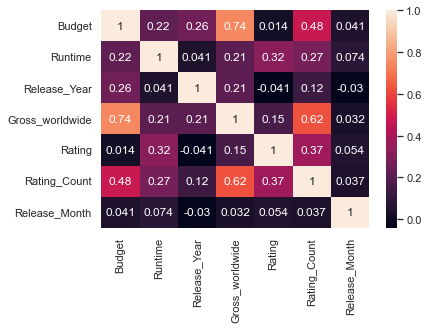

In [238]:
sns.heatmap(info.corr(), annot=True)

array([[<AxesSubplot:title={'center':'Movie_ID'}>,
        <AxesSubplot:title={'center':'Budget'}>,
        <AxesSubplot:title={'center':'Runtime'}>],
       [<AxesSubplot:title={'center':'Gross_worldwide'}>,
        <AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Rating_Count'}>],
       [<AxesSubplot:title={'center':'Release_Year'}>,
        <AxesSubplot:title={'center':'Release_Month'}>,
        <AxesSubplot:title={'center':'Release_Day'}>]], dtype=object)

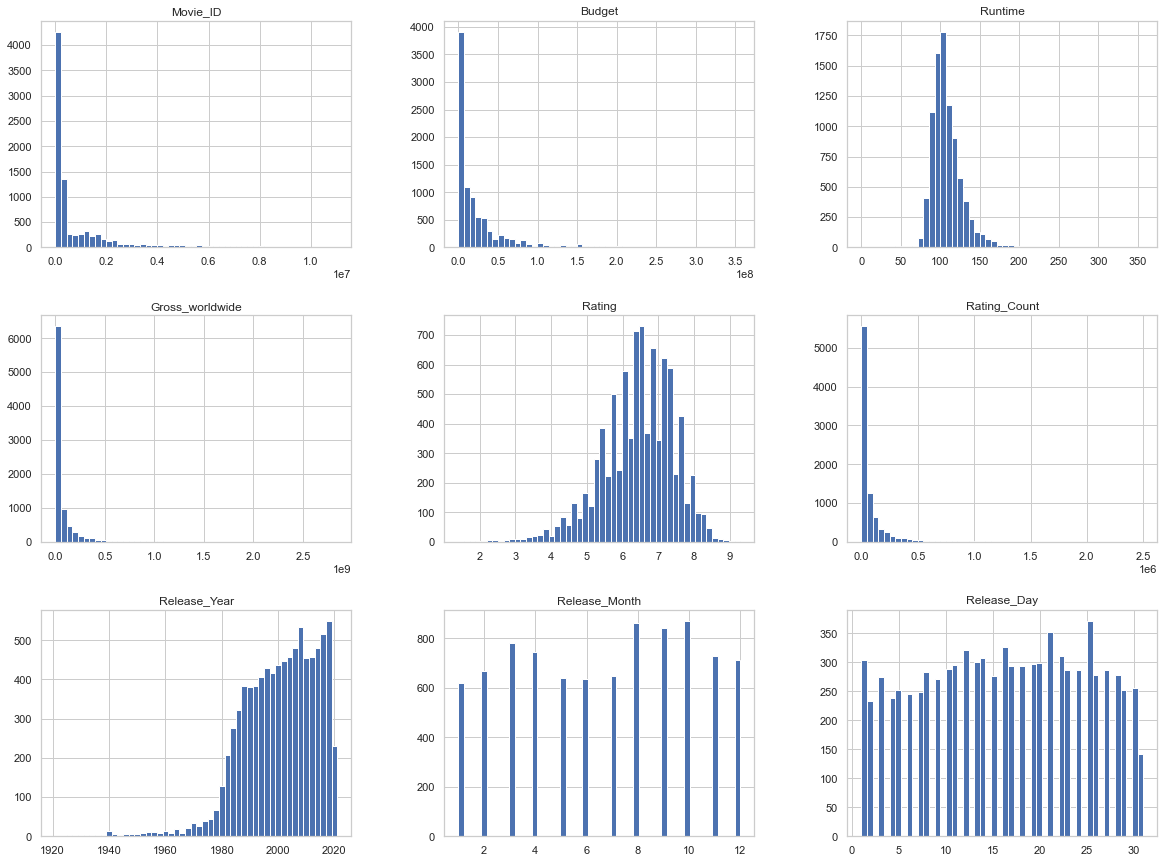

In [239]:
data.hist(bins=50, figsize=(20, 15))

array([[<AxesSubplot:xlabel='Budget', ylabel='Budget'>,
        <AxesSubplot:xlabel='Runtime', ylabel='Budget'>,
        <AxesSubplot:xlabel='Release_Year', ylabel='Budget'>,
        <AxesSubplot:xlabel='Gross_worldwide', ylabel='Budget'>,
        <AxesSubplot:xlabel='Rating', ylabel='Budget'>,
        <AxesSubplot:xlabel='Rating_Count', ylabel='Budget'>,
        <AxesSubplot:xlabel='Release_Month', ylabel='Budget'>],
       [<AxesSubplot:xlabel='Budget', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Runtime', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Release_Year', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Gross_worldwide', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Rating', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Rating_Count', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Release_Month', ylabel='Runtime'>],
       [<AxesSubplot:xlabel='Budget', ylabel='Release_Year'>,
        <AxesSubplot:xlabel='Runtime', ylabel='Release_Year'>,
        <AxesSubplot:xla

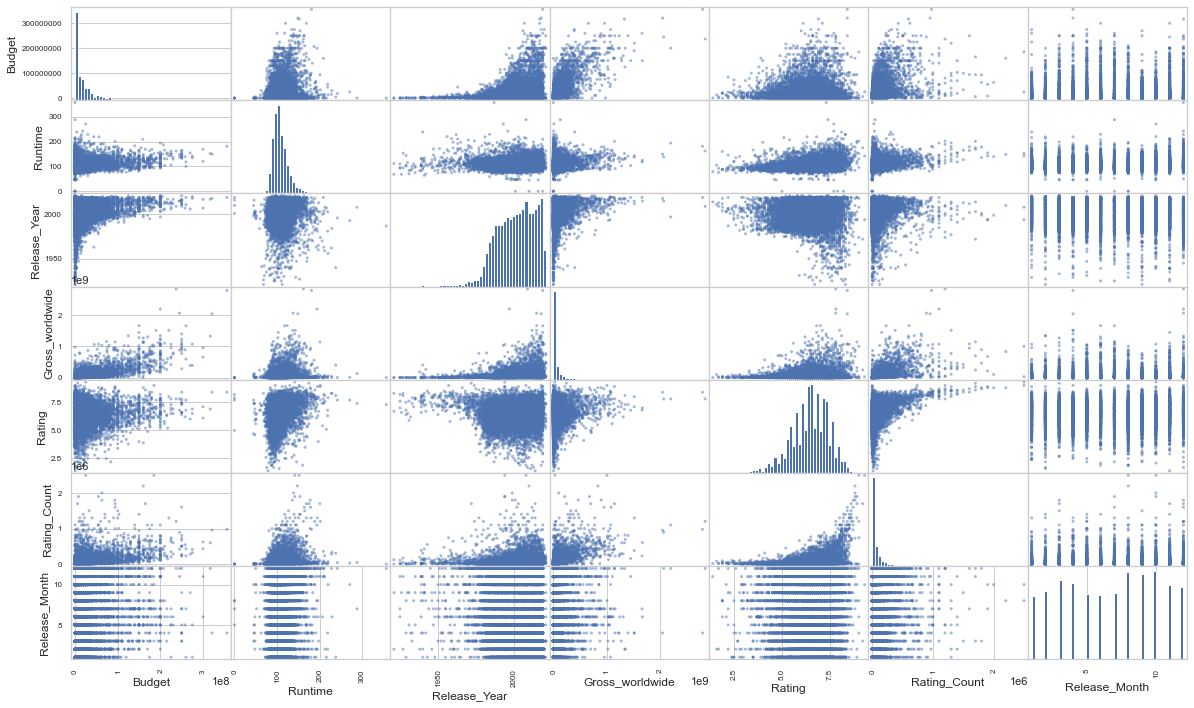

In [240]:
from pandas.plotting import scatter_matrix

scatter_matrix(info, figsize=(20, 12), hist_kwds={'bins': 50})

In [241]:
final = data.copy()

## `Genre` analysis

In [5]:
genre = parseWithMoneyAndCount(data, 'Genre')
genre

,Genre,Total,Count,Mean,Median
0,Action,270712872044,1892,1.430829e+08,50747624.5
1,Adventure,298281440727,1515,1.968854e+08,68514844.0
2,Animation,84311140430,400,2.107779e+08,104469116.5
3,Biography,26964736252,663,4.067079e+07,13448497.0
4,Comedy,222959609180,3232,6.898503e+07,20980459.5
5,Crime,87149222552,1589,5.484533e+07,19870567.0
6,Documentary,2710526736,243,1.115443e+07,2702578.0
7,Drama,224422468047,4454,5.038672e+07,14657538.0
8,Family,137386773092,936,1.467807e+08,51444620.5
9,Fantasy,153116140508,981,1.560817e+08,50693129.0


<AxesSubplot:xlabel='Genre'>

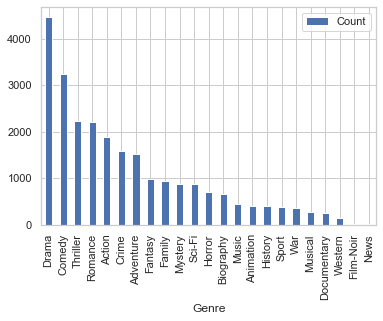

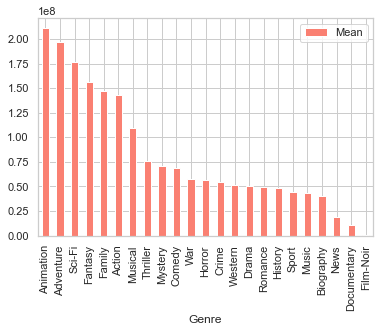

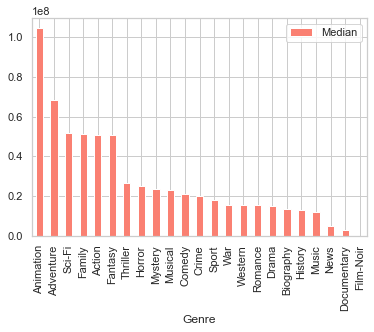

In [243]:
genre.sort_values(by='Count', ascending=False, inplace=True)
genre.plot.bar(x='Genre', y='Count')
genre.sort_values(by='Mean', ascending=False, inplace=True)
genre.plot.bar(x='Genre', y='Mean', color="salmon")
genre.sort_values(by='Median', ascending=False, inplace=True)
genre.plot.bar(x='Genre', y='Median', color="salmon")

From the bar chart that the following genres generate the highest gross:
1. Animation
2. Adventure
3. Action
4. Sci-fi
5. Fantasy
6. Family

Film-Noir stays at the lowest position

News, though with only 1 record, is in the top 6 of the median plot

In [244]:
genre.sort_values(by='Count', ascending=False)

,Genre,Total,Count,Mean,Median
7,Drama,224422468047,4454,5.038672e+07,14657538.0
4,Comedy,222959609180,3232,6.898503e+07,20980459.5
20,Thriller,169670494650,2224,7.629069e+07,26492560.5
17,Romance,109277844855,2201,4.964918e+07,15164458.0
0,Action,270712872044,1892,1.430829e+08,50747624.5
5,Crime,87149222552,1589,5.484533e+07,19870567.0
1,Adventure,298281440727,1515,1.968854e+08,68514844.0
9,Fantasy,153116140508,981,1.560817e+08,50693129.0
8,Family,137386773092,936,1.467807e+08,51444620.5
15,Mystery,62314981386,880,7.081248e+07,23673201.0


We will develop a **Genre Rank** based on Median but will ignore the film that have number of releases < 10

In [245]:
genre = genre[genre['Count'] > 10]
genre.sort_values(by='Median', ascending=True, inplace=True)
genre.reset_index(drop=True, inplace=True)
genreRank = dict()
for i, row in enumerate(genre['Genre']):
    genreRank[row] = i + 1
genreRank

{'Film-Noir': 1,
 'Documentary': 2,
 'Music': 3,
 'History': 4,
 'Biography': 5,
 'Drama': 6,
 'Romance': 7,
 'Western': 8,
 'War': 9,
 'Sport': 10,
 'Crime': 11,
 'Comedy': 12,
 'Musical': 13,
 'Mystery': 14,
 'Horror': 15,
 'Thriller': 16,
 'Fantasy': 17,
 'Action': 18,
 'Family': 19,
 'Sci-Fi': 20,
 'Adventure': 21,
 'Animation': 22}

We rank the genres by the highest rank of Genre in the list of Genres(Since Genre is multivalued attributes)

In [4]:
from scipy.stats import pearsonr

In [247]:
def getRank(listGenre):
    max = -1
    for genre in listGenre:
        if genre not in genreRank.keys():
            continue
        if genreRank[genre] > max:
            max = genreRank[genre]
    if max != -1:
        return max
    return 0

Pearsonr correlation between GenreRank and Gross: 0.253


<AxesSubplot:xlabel='GenreRank', ylabel='Gross_worldwide'>

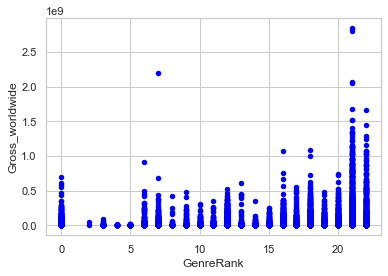

In [248]:
data2 = data.copy()
data2['GenreRank'] = data2['Genre'].apply(getRank)
corr = pearsonr(data2['GenreRank'], data2['Gross_worldwide'])[0]
print('Pearsonr correlation between GenreRank and Gross: %.3f' % corr)
data2.plot.scatter(x='GenreRank', y='Gross_worldwide', color='blue')

We rank the genre by total rank of Genre in the list of Genres

Pearsons correlation between GenreRank and Gross: 0.316


<AxesSubplot:xlabel='GenreRank', ylabel='Gross_worldwide'>

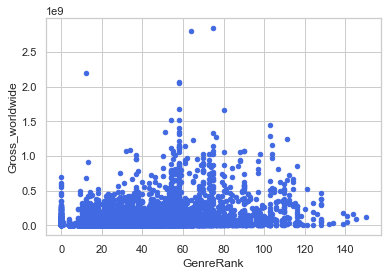

In [249]:
def getRank(listGenre):
    max = -1
    for genre in listGenre:
        if genre not in genreRank.keys():
            continue
        max += genreRank[genre]
    if max != -1:
        return max
    return 0


data2 = data.copy()
data2['GenreRank'] = data2['Genre'].apply(getRank)
corr = pearsonr(data2['GenreRank'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between GenreRank and Gross: %.3f' % corr)
data2.plot.scatter(x='GenreRank', y='Gross_worldwide', color='royalblue')

We we rank the genre by average rank of Genre in the list of Genres(Since Genre is multivalued attributes)

Pearsons correlation between GenreRank and Gross: 0.323


<AxesSubplot:xlabel='GenreRank', ylabel='Gross_worldwide'>

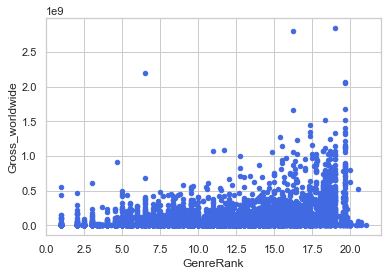

In [250]:
def getRank(listGenre):
    max = 0
    for genre in listGenre:
        if genre not in genreRank.keys():
            continue
        max += genreRank[genre]
    if max == 0:
        return random.randint(1, 15)
    return max / len(listGenre)


data2 = data.copy()
data2['GenreRank'] = data2['Genre'].apply(getRank)
corr = pearsonr(data2['GenreRank'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between GenreRank and Gross: %.3f' % corr)
data2.plot.scatter(x='GenreRank', y='Gross_worldwide', color='royalblue')

In [251]:
final['GenreRank'] = data2['GenreRank']

Now we will test the hypothesis that movie with Genre **Adventure** will have more value than other movies

Pearsons correlation between IsAdventure and Gross: 0.366


<AxesSubplot:xlabel='IsAdventure', ylabel='Gross_worldwide'>

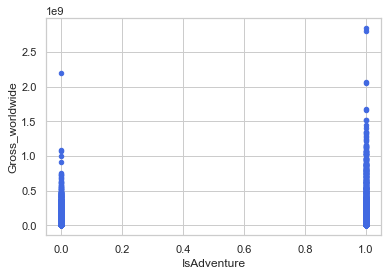

In [6]:
data2=data.copy()
data2['IsAdventure']=data2['Genre'].apply(lambda x: 1 if 'Adventure' in x else 0)
corr= pearsonr(data2['IsAdventure'],data2['Gross_worldwide'])[0]
print('Pearsons correlation between IsAdventure and Gross: %.3f' % corr)
data2.plot.scatter(x='IsAdventure',y='Gross_worldwide',color='royalblue')

We will choose this one since it has high correlation of 0.366

In [7]:
final['IsAdventure'] = data2['IsAdventure']

NameError: name 'final' is not defined

## Release_Day analysis

In [252]:
data2 = data.copy()
data2['Release_Data'] = pd.to_datetime(data2['Release_Data'], format='%Y-%m-%d')
data2 = data2.assign(WeekDay=data2['Release_Data'].dt.weekday + 2)
data2['WeekDay'].value_counts()

6    6790
4    1004
5     624
7     131
3      89
2      60
8      54
Name: WeekDay, dtype: int64

<AxesSubplot:xlabel='index'>

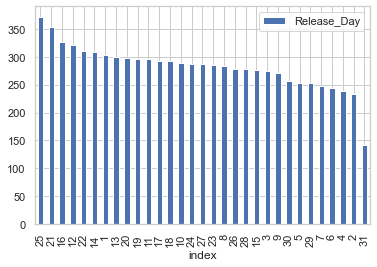

In [253]:
data['Release_Day'].value_counts().reset_index().plot.bar(x='index', y='Release_Day')

<AxesSubplot:xlabel='index'>

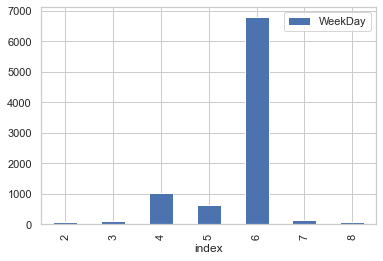

In [254]:
data2['WeekDay'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='WeekDay')

Movies tend to release in Friday

<AxesSubplot:xlabel='WeekDay', ylabel='Gross_worldwide'>

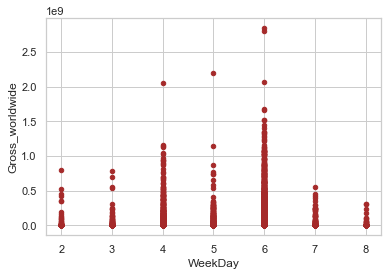

In [255]:
data2.plot.scatter(x='WeekDay', y='Gross_worldwide', color='brown')

No linear relation

Pearsons correlation between WeekDay and Gross: 0.003


<AxesSubplot:xlabel='WeekDay', ylabel='Gross_worldwide'>

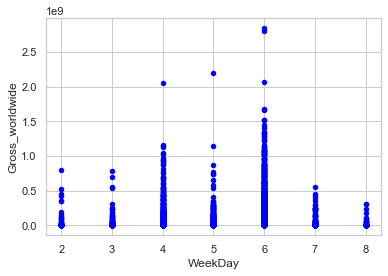

In [256]:
corr = pearsonr(data2['WeekDay'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between WeekDay and Gross: %.3f' % corr)
data2.plot.scatter(x='WeekDay', y='Gross_worldwide', color='blue')

Hypothesis: Did movies released in Friday or Wednesday have more gross then others?

Pearsons correlation between IsFriWed and Gross: 0.047


<AxesSubplot:xlabel='IsFriWed', ylabel='Gross_worldwide'>

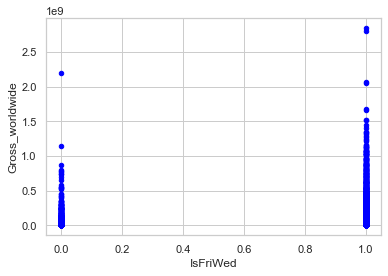

In [257]:
data2['IsFriWed'] = data2['WeekDay'].apply(lambda x: 1 if x in [4, 6] else 0)
corr = pearsonr(data2['IsFriWed'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between IsFriWed and Gross: %.3f' % corr)
data2.plot.scatter(x='IsFriWed', y='Gross_worldwide', color='blue')

Not very relevant between them!

## Release_Month analysis


Number of release by month

<AxesSubplot:xlabel='Month'>

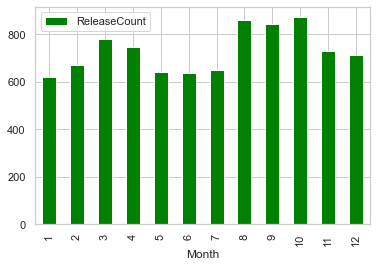

In [258]:
month = data['Release_Month'].value_counts().reset_index().sort_values(by='index', ascending=True)
month = month.rename(columns={'index': 'Month', 'Release_Month': 'ReleaseCount'})
month.plot.bar(x='Month', y='ReleaseCount', color='green')

How average gross depend on Release_Month and combine with Release_Year.

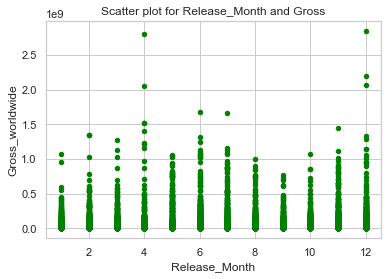

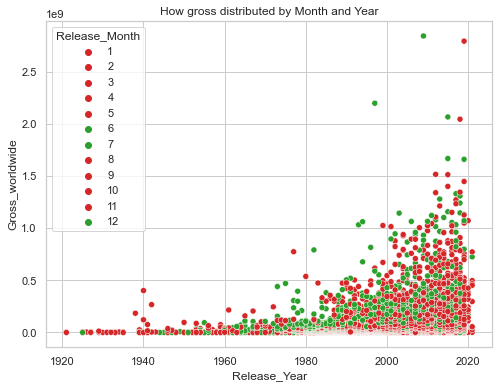

In [259]:
cols = ['Release_Month', 'Gross_worldwide']

data.plot.scatter(x='Release_Month', y='Gross_worldwide', color='green')
plt.title("Scatter plot for Release_Month and Gross")
#3
gColor = [6, 7, 12]
rColor = [1, 2, 3, 4, 5, 8, 9, 10, 11]
colorMap = dict()
for i in gColor:
    colorMap[i] = 'tab:green'
for i in rColor:
    colorMap[i] = 'tab:red'
C = colorMap
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Release_Year', y='Gross_worldwide', hue='Release_Month', palette=C)
plt.title("How gross distributed by Month and Year")
plt.show()

We can see that gross tends to increase by year.

In [260]:
corr = pearsonr(data2['Release_Year'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between Release_Year and Gross: %.3f' % corr)

Pearsons correlation between Release_Year and Gross: 0.209


Text(0.5, 1.0, 'Median by Month')

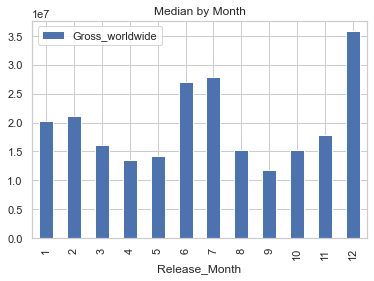

In [261]:
cols = ['Release_Month', 'Gross_worldwide']

month = data[cols]
month = month.groupby("Release_Month").median().reset_index()
#
month.plot.bar(x='Release_Month', y='Gross_worldwide')
plt.title("Median by Month")

By Median Plot of Month and Gross. We can see that 5,6,7,12 is the month that are top month(We call special month)

Pearsons correlation between SpecialMonth and Gross: 0.120


<AxesSubplot:xlabel='SpecialMonth', ylabel='Gross_worldwide'>

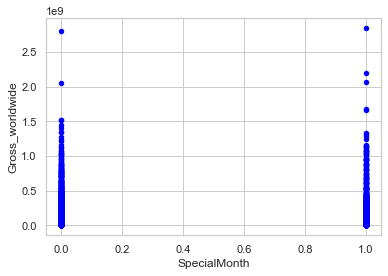

In [262]:
def getSpecialMonth(month):
    specialMonth = [6, 7, 12]
    if month in specialMonth:
        return 1
    else:
        return 0


data2 = data.copy()
data2['SpecialMonth'] = data2['Release_Month'].apply(getSpecialMonth)
corr = pearsonr(data2['SpecialMonth'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between SpecialMonth and Gross: %.3f' % corr)
data2.plot.scatter(x='SpecialMonth', y='Gross_worldwide', color='blue')

This correlation is low. We will consider by Mean instead

Text(0.5, 1.0, 'Average by Month')

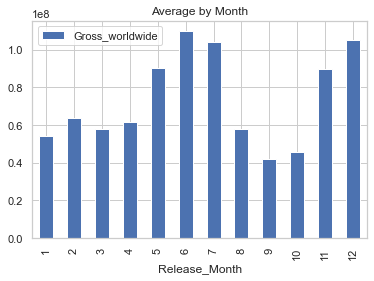

In [263]:
month = data[cols]
month = month.groupby("Release_Month").mean().reset_index()
#1
month.plot.bar(x='Release_Month', y='Gross_worldwide')
plt.title("Average by Month")

By Mean Plot of Month and Gross. We can see that 5,6,7,11,12 is the month that are top month(We call special month)

Pearsons correlation between SpecialMonth and Gross: 0.142


<AxesSubplot:xlabel='SpecialMonth', ylabel='Gross_worldwide'>

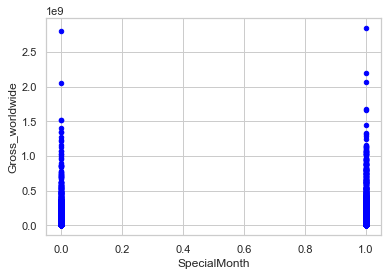

In [264]:
def getSpecialMonth(month):
    specialMonth = [5, 6, 7, 11, 12]
    if month in specialMonth:
        return 1
    else:
        return 0


data2 = data.copy()
data2['SpecialMonth'] = data2['Release_Month'].apply(getSpecialMonth)
corr = pearsonr(data2['SpecialMonth'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between SpecialMonth and Gross: %.3f' % corr)
data2.plot.scatter(x='SpecialMonth', y='Gross_worldwide', color='blue')

This has higher correlation so we will choose it

In [265]:
final['SpecialMonth'] = data2['SpecialMonth']

## Budget analysis


In [266]:
data['Gross_worldwide'].describe()

count    8.752000e+03
mean     7.172680e+07
std      1.564077e+08
min      9.500000e+01
25%      4.443069e+06
50%      1.821152e+07
75%      6.560984e+07
max      2.847246e+09
Name: Gross_worldwide, dtype: float64

Min value is 2100 $

In [267]:
data['Budget'].describe()

count    8.752000e+03
mean     2.351613e+07
std      3.713278e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+07
75%      3.000000e+07
max      3.560000e+08
Name: Budget, dtype: float64

No 0$ value Budget (Min value is 15000$)


Relation between Budget and Gross_worldwide

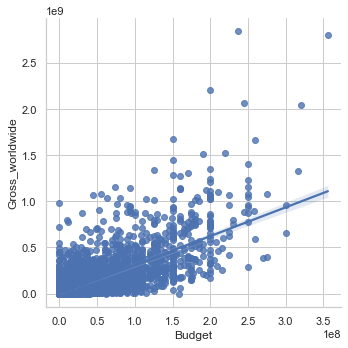

In [268]:
sns.lmplot(data=data, x='Budget', y='Gross_worldwide')

Now we will test the correlation between Budget and Gross_WorldWide 

In [269]:
corr = pearsonr(data['Budget'], data['Gross_worldwide'])[0]
print('Pearsons correlation between Budget and Gross: %.3f' % corr)

Pearsons correlation between Budget and Gross: 0.741


Budget and Gross_worldwide correlation may perform very well in our future model

## Cast Analysis



Hypothesis: Is Gross depend on number of actors showed on movie's imdb webpage?

In [270]:
data2 = data.copy()
data2['numCast'] = data2['Cast'].apply(lambda x: len(x))
corr = pearsonr(data2['numCast'], data2['Gross_worldwide'])[0]
data2['numCast'].value_counts()

18    8203
16      66
17      64
15      62
14      53
13      48
12      45
10      35
11      35
9       26
8       23
7       17
6       17
5       12
1       11
4       11
3       11
2        8
0        5
Name: numCast, dtype: int64

Pearsons correlation between numCast and Gross: 0.059


<AxesSubplot:xlabel='numCast', ylabel='Gross_worldwide'>

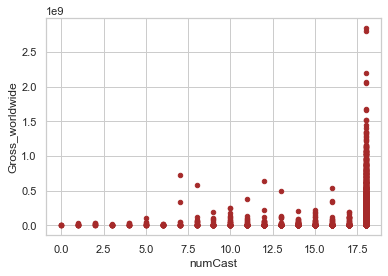

In [271]:
corr = pearsonr(data2['numCast'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between numCast and Gross: %.3f' % corr)
data2.plot.scatter(x='numCast', y='Gross_worldwide', color='brown')

->>Very low correlation

Since all imdb pages tend to have more than 17 casts per page

Cast and average gross of the movies they cast for

In [40]:
cast = parseWithMoneyAndCount(data, 'Cast')
cast.sort_values(by='Count', ascending=False, inplace=True)
cast

,Cast,Total,Count,Mean,Median
61269,Samuel L. Jackson,18580682439,83,2.238636e+08,62022014.0
58569,Robert De Niro,6722811414,77,8.730924e+07,45491656.0
49987,Morgan Freeman,10397736669,65,1.599652e+08,95943453.0
33993,John Goodman,6019264965,62,9.708492e+07,37207906.0
41569,Liam Neeson,7206028513,61,1.181316e+08,48878502.0
...,...,...,...,...,...
28218,István Znamenák,1240663,1,1.240663e+06,1240663.0
28219,Italia Coppola,636796,1,6.367960e+05,636796.0
28221,Italo Renda,34861529,1,3.486153e+07,34861529.0
28222,Itandehui Gutierrez,120673227,1,1.206732e+08,120673227.0


Text(0.5, 1.0, 'Cast and Number of Movies they cast for')

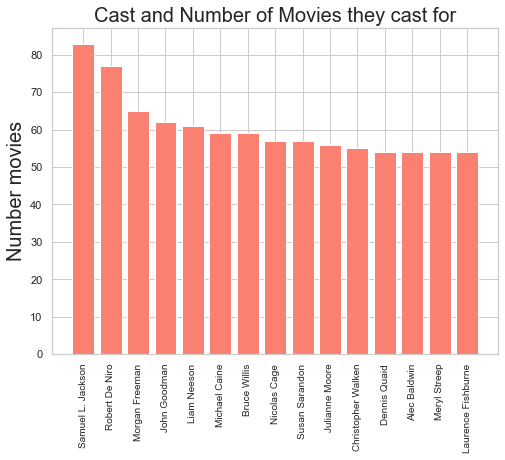

In [11]:
fig = plt.figure(figsize=(8, 6))
# plt.subplot(2,1,1)
data2 = cast.sort_values(by='Count', ascending=False)[0:15]
plt.bar(data=data2, x='Cast', height='Count', color="salmon")
plt.xticks(rotation=90, fontsize=10)
plt.ylabel("Number movies", fontsize=20)
plt.title("Cast and Number of Movies they cast for", fontsize=20)

Our data has name of 73026 casts

In [273]:
cast3Movies = cast[cast['Count'] < 3]
cast3Movies.sort_values(by='Median', ascending=False, inplace=True)
cast3Movies

,Cast,Total,Count,Mean,Median
62173,Sean Anthony Moran,2847246203,1,2.847246e+09,2.847246e+09
30536,Jason Whyte,2847246203,1,2.847246e+09,2.847246e+09
62306,Sean Patrick Murphy,2847246203,1,2.847246e+09,2.847246e+09
29659,James Patrick Pitt,2847246203,1,2.847246e+09,2.847246e+09
38160,Kelly Kilgour,2847246203,1,2.847246e+09,2.847246e+09
...,...,...,...,...,...
25851,Hammou Abaou,95,1,9.500000e+01,9.500000e+01
31262,Jeff Prewett,95,1,9.500000e+01,9.500000e+01
28953,Jacqueline Harris,95,1,9.500000e+01,9.500000e+01
46652,Matthew R. Anderson,95,1,9.500000e+01,9.500000e+01


38972 Casts with lower than 3 movies cast for and some people with very high Median Value

It will cause problem of not reliable rank when we try to develop a rank system is this type of fields

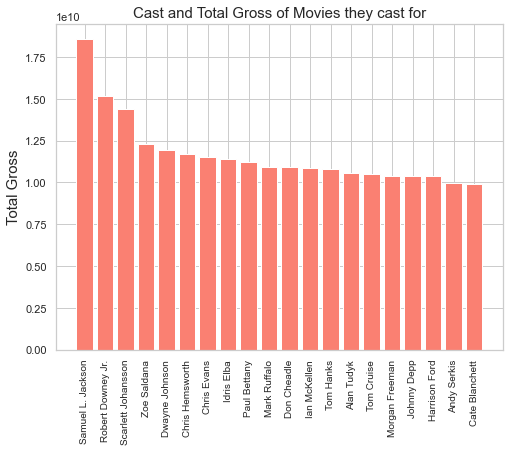

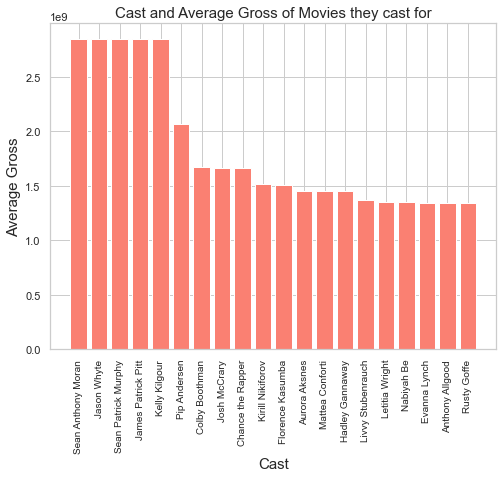

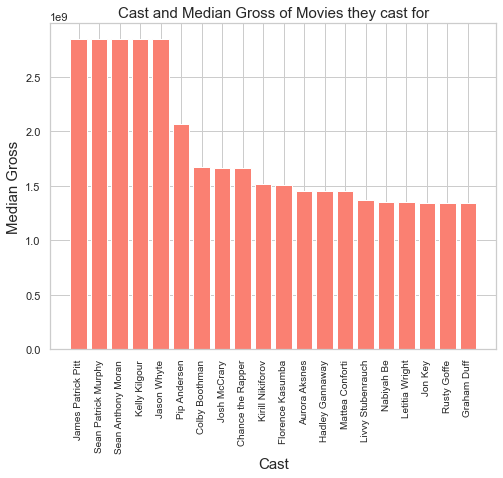

In [14]:
fig = plt.figure(figsize=(8, 6))
# plt.subplot(2,1,1)
data2 = cast.sort_values(by='Total', ascending=False)[0:20]
plt.bar(data=data2, x='Cast', height='Total', color="salmon")
plt.xticks(rotation=90, fontsize=10)
plt.ylabel("Total Gross", fontsize=15)
plt.title("Cast and Total Gross of Movies they cast for", fontsize=15)
fig = plt.figure(figsize=(8, 6))
# plt.subplot(2,1,2)
data3 = cast.sort_values(by='Mean', ascending=False)[0:20]
plt.bar(data=data3, x='Cast', height='Mean', color="salmon")
plt.xticks(rotation=90, fontsize=10)
plt.title("Cast and Average Gross of Movies they cast for", fontsize=15)
plt.xlabel("Cast", fontsize=15)
plt.ylabel("Average Gross", fontsize=15)

fig = plt.figure(figsize=(8, 6))
data3 = cast.sort_values(by='Median', ascending=False)[0:20]
plt.bar(data=data3, x='Cast', height='Median', color="salmon")
plt.xticks(rotation=90, fontsize=10)
plt.title("Cast and Median Gross of Movies they cast for", fontsize=15)
plt.xlabel("Cast", fontsize=15)
plt.ylabel("Median Gross", fontsize=15)
plt.show()

Those casts name is not very well-known. **Jason Whyte** and **Sean Anthony Moran** is casts with only 1 movies attended

Now we will develop a rank system for cast (Find top leader casts)

The number of movies they cast for must larger then 5 movies

In [41]:
cast = parseWithMoneyAndCount(data, 'Cast')
cast.sort_values(by='Count', ascending=False, inplace=True)
cast10Movies = cast[cast['Count'] > 5]
cast10Movies.sort_values(by='Mean', ascending=False, inplace=True)
cast10Movies.reset_index(drop=True, inplace=True)
cast10Movies

,Cast,Total,Count,Mean,Median
0,Rupert Grint,7786412658,8,9.733016e+08,9.383132e+08
1,Lupita Nyong'o,7278884954,8,9.098606e+08,1.020352e+09
2,Evangeline Lilly,6209206084,7,8.870294e+08,6.226741e+08
3,Chadwick Boseman,7668338102,9,8.520376e+08,1.506809e+08
4,Karen Gillan,8474182724,10,8.474183e+08,7.867049e+08
...,...,...,...,...,...
4569,Deborah Kerr,21481898,6,3.580316e+06,3.325950e+04
4570,Rita Taggart,19991204,6,3.331867e+06,2.243077e+06
4571,Tony Curtis,26234046,8,3.279256e+06,1.610252e+06
4572,Dick Cavett,30866179,10,3.086618e+06,1.324484e+06


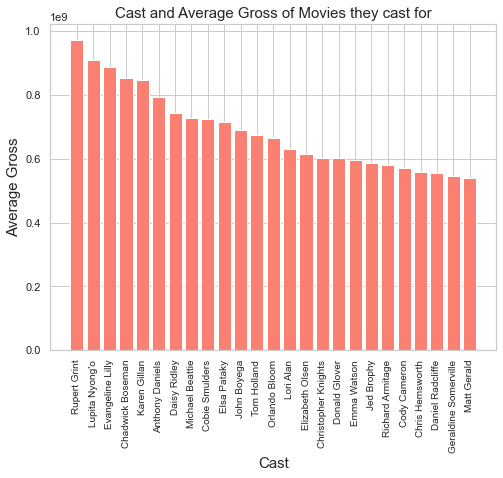

In [20]:
plt.figure(figsize=(8, 6))
data3 = cast10Movies.sort_values(by='Mean', ascending=False)[0:25]
plt.bar(data=data3, x='Cast', height='Mean', color="salmon")
plt.xticks(rotation=90, fontsize=10)
plt.title("Cast and Average Gross of Movies they cast for", fontsize=15)
plt.xlabel("Cast", fontsize=15)
plt.ylabel("Average Gross", fontsize=15)
plt.show()

We call them leader cast. And now move on to develop rank

In [42]:
cast10Movies.sort_values(by='Mean', ascending=True, inplace=True)
castRank = dict()
for i, row in enumerate(cast10Movies['Cast']):
    castRank[row] = i + 1
castRank

{'Arsinée Khanjian': 1,
 'Dick Cavett': 2,
 'Tony Curtis': 3,
 'Rita Taggart': 4,
 'Deborah Kerr': 5,
 'John Lennon': 6,
 'Victoria Abril': 7,
 'Jill Schoelen': 8,
 'Alison Steadman': 9,
 'Jacques Mathou': 10,
 'Lior Ashkenazi': 11,
 'Ramon Bieri': 12,
 'Mink Stole': 13,
 'Traci Lind': 14,
 'Emilio Fernández': 15,
 'Jim Metzler': 16,
 'Kathryn Grody': 17,
 'Cheryl Ladd': 18,
 'Patrick Huard': 19,
 'John Cullum': 20,
 'Ricki Lake': 21,
 'Jack Rader': 22,
 'Blu Mankuma': 23,
 'Peter Eyre': 24,
 'Gore Vidal': 25,
 'Don McKellar': 26,
 'Suniel Shetty': 27,
 'Matt Keeslar': 28,
 'Anne-Marie Johnson': 29,
 'Humphrey Bogart': 30,
 'Luke Askew': 31,
 'Marcello Mastroianni': 32,
 'Richard Widmark': 33,
 'John Savident': 34,
 'Vrajesh Hirjee': 35,
 'Millie Perkins': 36,
 'Tim Barlow': 37,
 'Anna Massey': 38,
 'Jodie Markell': 39,
 'Amy Locane': 40,
 'Louise Latham': 41,
 'Gordon Pinsent': 42,
 'Jennifer Edwards': 43,
 'Ingrid Bergman': 44,
 'Debbie Harry': 45,
 'Woody Strode': 46,
 'Sandy Baron'

Apply to data to get CastsRank. Here we total the rank value

In [43]:
def getCastsTeamRank(casts):
    total = 0
    for cast in casts:
        if cast not in castRank.keys():
            total += random.randint(1, 200)
            continue
        total += castRank[cast]
    return total

In [44]:
data2 = data.copy()
data2['CastsRank'] = data2['Cast'].apply(getCastsTeamRank)
data2['CastsRank'].value_counts()

0        5
1709     5
21983    4
1949     4
1934     4
        ..
4035     1
28977    1
15723    1
7343     1
31227    1
Name: CastsRank, Length: 7753, dtype: int64

Pearsons correlation between CastsRank and Gross: 0.526


<AxesSubplot:xlabel='CastsRank', ylabel='Gross_worldwide'>

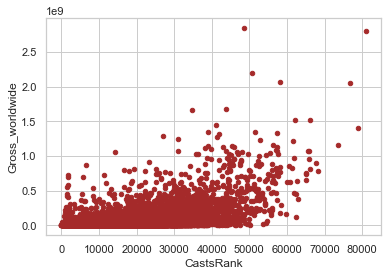

In [48]:
corr = pearsonr(data2['CastsRank'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between CastsRank and Gross: %.3f' % corr)
data2.plot.scatter(x='CastsRank', y='Gross_worldwide', color='brown')

In [281]:
final['CastsRank'] = data2['CastsRank']

How about we take the rank means?

In [282]:
def getCastsTeamRank(casts):
    length = len(casts)
    if length == 0:
        length = 1
    total = 0
    for cast in casts:
        if cast in castRank.keys():
            total += castRank[cast]
    return total / length

Pearsons correlation between CastsRank and Gross: 0.513


<AxesSubplot:xlabel='CastsRank', ylabel='Gross_worldwide'>

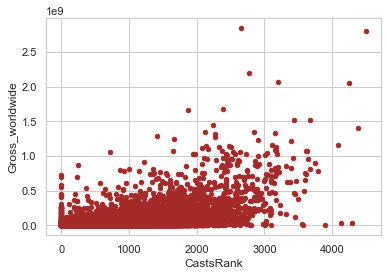

In [283]:
data2 = data.copy()
data2['CastsRank'] = data2['Cast'].apply(getCastsTeamRank)
data2['CastsRank'].value_counts()
corr = pearsonr(data2['CastsRank'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between CastsRank and Gross: %.3f' % corr)
data2.plot.scatter(x='CastsRank', y='Gross_worldwide', color='brown')

Both are approximately identical correlation value of **0.51**

Now we will extract more feature That is:
- Number of top lead actors(Actors that in the top **100**)
- Have lead actor in high top (In top **30**)

**NumLeadActors**

In [284]:
cast10Movies.sort_values(by='Mean', ascending=False, inplace=True)
top100Cast = list(cast10Movies['Cast'][0:100])


def getNumLeadActors(casts):
    total = 0
    for cast in casts:
        if cast in top100Cast:
            total += 1
    return total


data2 = data.copy()
data2['NumLeadActors'] = data2['Cast'].apply(getNumLeadActors)
data2['NumLeadActors'].value_counts()


0     7988
1      574
2      103
3       34
4       22
5       15
7        5
9        4
8        3
6        2
11       2
Name: NumLeadActors, dtype: int64

Pearsons correlation between NumLeadActors and Gross: 0.593


<AxesSubplot:xlabel='NumLeadActors', ylabel='Gross_worldwide'>

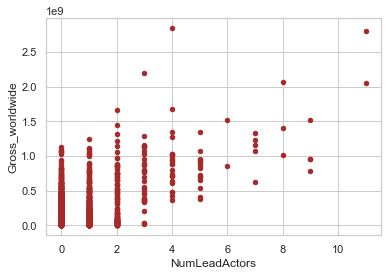

In [285]:
corr = pearsonr(data2['NumLeadActors'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between NumLeadActors and Gross: %.3f' % corr)
data2.plot.scatter(x='NumLeadActors', y='Gross_worldwide', color='brown')

In [286]:
final['NumLeadActors'] = data2['NumLeadActors']

HasTop30Actors

Pearsons correlation between HasTop50Actors and Gross: 0.364


<AxesSubplot:xlabel='HasTop50Actors', ylabel='Gross_worldwide'>

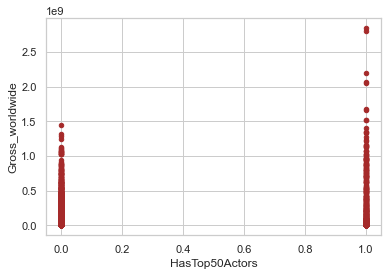

In [49]:
cast10Movies.sort_values(by='Mean', ascending=False, inplace=True)
top50Cast = list(cast10Movies['Cast'][0:50])


def getHasTop30Actors(casts):
    for cast in casts:
        if cast in top50Cast:
            return 1
    return 0


data2 = data.copy()
data2['HasTop50Actors'] = data2['Cast'].apply(getHasTop30Actors)
corr = pearsonr(data2['HasTop50Actors'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between HasTop50Actors and Gross: %.3f' % corr)
data2.plot.scatter(x='HasTop50Actors', y='Gross_worldwide', color='brown')

In [288]:
final['HasTop50Actors'] = data2['HasTop50Actors']

## Crew analysis

Hypothesis: Does revenue depend on number of crews appear on movie's imdb website?

Pearsons correlation between NumCrews and Gross: 0.190


<AxesSubplot:xlabel='NumCrews', ylabel='Gross_worldwide'>

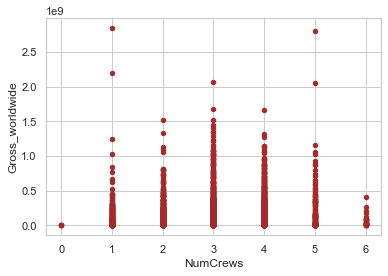

In [289]:
data2 = data.copy()
data2['NumCrews'] = data2['Crew'].apply(lambda x: len(x))
corr = pearsonr(data2['NumCrews'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between NumCrews and Gross: %.3f' % corr)
data2.plot.scatter(x='NumCrews', y='Gross_worldwide', color='brown')

In [290]:
final['NumCrews'] = data2['NumCrews']

In [291]:
crew = parseWithMoneyAndCount(data, 'Crew')
crew.sort_values(by='Count', ascending=False)

,Crew,Total,Count,Mean,Median
10649,Woody Allen,1192064607,43,2.772243e+07,14792779.0
1879,Clint Eastwood,3458362840,38,9.100955e+07,53572298.0
9561,Stephen King,1891234174,36,5.253428e+07,22759009.5
9715,Steven Spielberg,10743871515,34,3.159962e+08,288074136.5
5181,John Hughes,2930471621,33,8.880217e+07,49944325.0
...,...,...,...,...,...
4407,James Leo Herlihy,44801177,1,4.480118e+07,44801177.0
4406,James Lee Burke,5009305,1,5.009305e+06,5009305.0
4405,James Lee Barrett,126737428,1,1.267374e+08,126737428.0
4404,James Lasdun,2048740,1,2.048740e+06,2048740.0


Number of movies each crew participate in

<AxesSubplot:xlabel='Crew'>

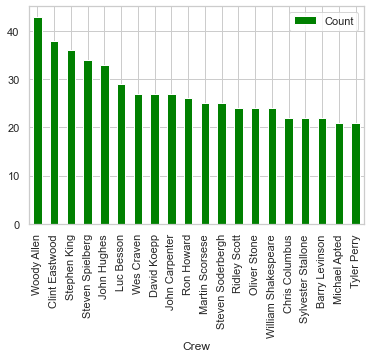

In [292]:
crew.sort_values(by='Count', ascending=False)[0:20].plot.bar(x='Crew', y='Count', color='green')

In [293]:
crew.sort_values(by='Mean', ascending=False)[0:20]

,Crew,Total,Count,Mean,Median
639,Anthony Russo,6844248984,5,1.368850e+09,1.153337e+09
5007,Joe Russo,6844248984,5,1.368850e+09,1.153337e+09
5004,Joe Robert Cole,1347597973,1,1.347598e+09,1.347598e+09
9486,Stan Lee,13024534758,12,1.085378e+09,9.784765e+08
5526,Josh Cooley,1073394593,1,1.073395e+09,1.073395e+09
5198,John Knoll,1056057720,1,1.056058e+09,1.056058e+09
3046,Eric Guillon,1034800131,1,1.034800e+09,1.034800e+09
557,Angus MacLane,1028570942,1,1.028571e+09,1.028571e+09
10351,Victoria Strouse,1028570942,1,1.028571e+09,1.028571e+09
5389,Jon Watts,2012094920,2,1.006047e+09,1.006047e+09


There are lots writers and directors who participate only in few movies

In [294]:
releases4crew = crew[crew['Count'] > 4]
releases4crew.sort_values(by='Mean', ascending=False)[0:20]

,Crew,Total,Count,Mean,Median
639,Anthony Russo,6844248984,5,1.368850e+09,1.153337e+09
5007,Joe Russo,6844248984,5,1.368850e+09,1.153337e+09
9486,Stan Lee,13024534758,12,1.085378e+09,9.784765e+08
4229,J.K. Rowling,9255312560,10,9.255313e+08,9.155662e+08
9571,Stephen McFeely,8655378624,10,8.655379e+08,5.322244e+08
2494,David Yates,6021591899,7,8.602274e+08,9.344541e+08
1779,Christopher Markus,9400391739,11,8.545811e+08,6.447831e+08
6172,Lee Unkrich,3892224463,5,7.784449e+08,8.078179e+08
8173,Philippa Boyens,6663807561,9,7.404231e+08,9.474951e+08
489,Andrew Stanton,5672435426,8,7.090544e+08,7.308323e+08


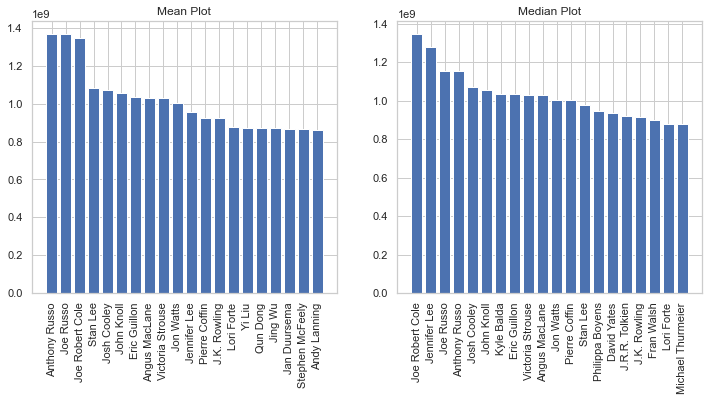

In [295]:
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(data=crew.sort_values(by='Mean', ascending=False)[0:20], x='Crew', height='Mean')
plt.xticks(rotation=90)
plt.title("Mean Plot")
plt.subplot(1, 2, 2)
plt.bar(data=crew.sort_values(by='Median', ascending=False)[0:20], x='Crew', height='Median')
# crew.sort_values(by='Mean',ascending=False)[0:20].plot.bar(x='Crew',y='Mean')
plt.xticks(rotation=90)
plt.title("Median Plot")
plt.show()

The top seems not change very much

Now we will develop rank of crew

In [296]:
crewRank = dict()
releases4crew = releases4crew.sort_values(by='Mean').reset_index(drop=True)
for i, row in enumerate(releases4crew['Crew']):
    crewRank[row] = i + 1
crewRank


{'Federico Fellini': 1,
 'André Téchiné': 2,
 'Ingmar Bergman': 3,
 'Todd Solondz': 4,
 'Errol Morris': 5,
 'Warren Miller': 6,
 'Bill Forsyth': 7,
 'Krzysztof Kieslowski': 8,
 'Krzysztof Piesiewicz': 9,
 'Sally Potter': 10,
 'Louis Malle': 11,
 'Mark Monroe': 12,
 'Henry James': 13,
 'Alan Rudolph': 14,
 'Zalman King': 15,
 'Hanif Kureishi': 16,
 'Atom Egoyan': 17,
 'Naomi Foner': 18,
 'François Truffaut': 19,
 'Bille August': 20,
 'Werner Herzog': 21,
 'Desmond Nakano': 22,
 'Alfred Hitchcock': 23,
 'Agnieszka Holland': 24,
 'Sam Peckinpah': 25,
 'Olivier Assayas': 26,
 'Harold Pinter': 27,
 'Patrice Leconte': 28,
 'Laura Jones': 29,
 'Allan Scott': 30,
 'Billy Wilder': 31,
 'Don Coscarelli': 32,
 'Whit Stillman': 33,
 'Sergio Donati': 34,
 'David Zelag Goodman': 35,
 'James R. Silke': 36,
 'Robin Bhatt': 37,
 'Frank Cottrell Boyce': 38,
 'Menahem Golan': 39,
 'Michael Winterbottom': 40,
 'Neal Jimenez': 41,
 'Farhan Akhtar': 42,
 'Denys Arcand': 43,
 'Uwe Boll': 44,
 'Eric Red': 45,

Now we will rank the movies based on crew team rank

In [297]:
import random


def getCrewsTeamRank(crews):
    total = 0
    for crew in crews:
        if crew not in crewRank.keys():
            total += random.randint(1, 100)
            continue
        total += crewRank[crew]
    return total


data2 = data.copy()
data2['crewsTeamRank'] = data2['Crew'].apply(getCrewsTeamRank)
data2['crewsTeamRank'].value_counts()

260     45
95      32
142     32
98      31
78      30
        ..
618      1
1185     1
1189     1
1044     1
2606     1
Name: crewsTeamRank, Length: 2126, dtype: int64

Pearsons correlation between crewsTeamRank and Gross: 0.551


<AxesSubplot:xlabel='crewsTeamRank', ylabel='Gross_worldwide'>

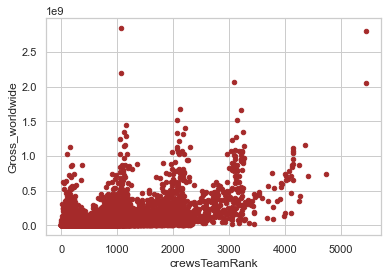

In [298]:
corr = pearsonr(data2['crewsTeamRank'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between crewsTeamRank and Gross: %.3f' % corr)
data2.plot.scatter(x='crewsTeamRank', y='Gross_worldwide', color='brown')

In [299]:
final['crewsTeamRank'] = data2['crewsTeamRank']

Result correlation:
- By mean total rank: 0.551
- By mean mean rank: 0.516
- By median total rank : 0.535
- By median mean rank : 0.470

Now consider number of crew in top 150 for each movie

In [300]:
releases4crew.sort_values(by='Mean', ascending=False, inplace=True)
top150Crew = list(releases4crew['Crew'][0:150])


def getNumTopCrew(crews):
    total = 0
    for crew in crews:
        if crew in top150Crew:
            total += 1
    return total


data2 = data.copy()
data2['NumTopCrew'] = data2['Crew'].apply(getNumTopCrew)
data2['NumTopCrew'].value_counts()


0    7911
1     555
2     187
3      76
4      21
5       2
Name: NumTopCrew, dtype: int64

Pearsons correlation between NumTopCrew and Gross: 0.621


<AxesSubplot:xlabel='NumTopCrew', ylabel='Gross_worldwide'>

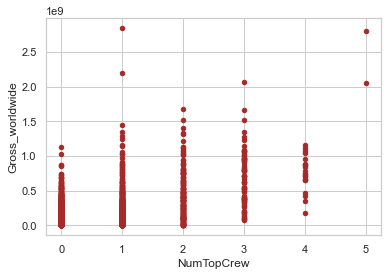

In [301]:
corr = pearsonr(data2['NumTopCrew'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between NumTopCrew and Gross: %.3f' % corr)
data2.plot.scatter(x='NumTopCrew', y='Gross_worldwide', color='brown')

In [302]:
final['NumTopCrew'] = data2['NumTopCrew']

Consider film have crew in top 50

In [303]:
releases4crew.sort_values(by='Mean', ascending=False, inplace=True)
top50Crew = list(releases4crew['Crew'][0:50])


def getHasTopCrew(crews):
    for crew in crews:
        if crew in top50Crew:
            return 1
    return 0


data2 = data.copy()
data2['HasTopCrew'] = data2['Crew'].apply(getHasTopCrew)
data2['HasTopCrew'].value_counts()


0    8480
1     272
Name: HasTopCrew, dtype: int64

Pearsons correlation between HasTopCrew and Gross: 0.544


<AxesSubplot:xlabel='HasTopCrew', ylabel='Gross_worldwide'>

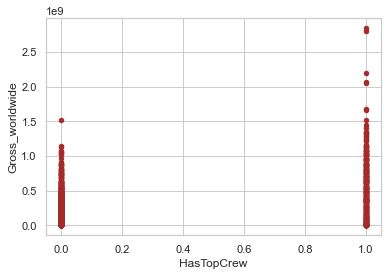

In [304]:
corr = pearsonr(data2['HasTopCrew'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between HasTopCrew and Gross: %.3f' % corr)
data2.plot.scatter(x='HasTopCrew', y='Gross_worldwide', color='brown')

In [305]:
final['HasTopCrew'] = data2['HasTopCrew']

## Studio Analysis

Hypothesis: Is gross depends on number of Studios participate in?

In [306]:
data2 = data.copy()
data2['NumStudios'] = data2['Studios'].apply(lambda x: len(x))
data2['NumStudios'].value_counts()

3    5307
2    2088
1    1291
0      41
4      22
5       3
Name: NumStudios, dtype: int64

Pearsons correlation between NumStudios and Gross: 0.133


<AxesSubplot:xlabel='NumStudios', ylabel='Gross_worldwide'>

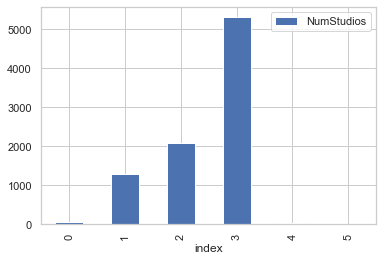

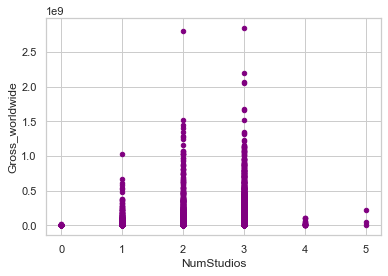

In [307]:
data2['NumStudios'].value_counts().reset_index().sort_values(by='index', ascending=True).plot.bar(x='index',
                                                                                                  y='NumStudios')
corr = pearsonr(data2['NumStudios'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between NumStudios and Gross: %.3f' % corr)
data2.plot.scatter(x='NumStudios', y='Gross_worldwide', color='purple')

In [308]:
final['NumStudios'] = data2['NumStudios']

Correlation **0.112**: Not very relevant

Movies with Number of Studios Of 4 or 5 may be outlier. We will try to drop it.


In [309]:
data3 = data2.drop(list(data[data2['NumStudios'] == 4].index), axis=0)
data3 = data3.drop(list(data[data2['NumStudios'] == 5].index), axis=0)

Pearsons correlation between NumStudios and Gross: 0.135


<AxesSubplot:xlabel='NumStudios', ylabel='Gross_worldwide'>

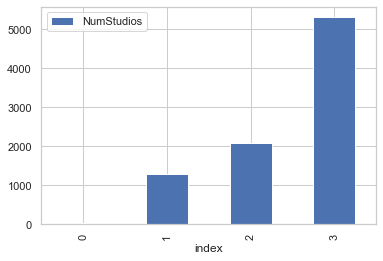

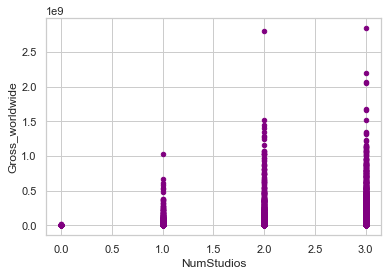

In [310]:
data3['NumStudios'].value_counts().reset_index().sort_values(by='index', ascending=True).plot.bar(x='index',
                                                                                                  y='NumStudios')
corr = pearsonr(data3['NumStudios'], data3['Gross_worldwide'])[0]
print('Pearsons correlation between NumStudios and Gross: %.3f' % corr)
data3.plot.scatter(x='NumStudios', y='Gross_worldwide', color='purple')

Correlation stay the same so we don't need to delete them

Studio and Gross of the movies they work for
* Have not devide gross to each Studio if they coop together

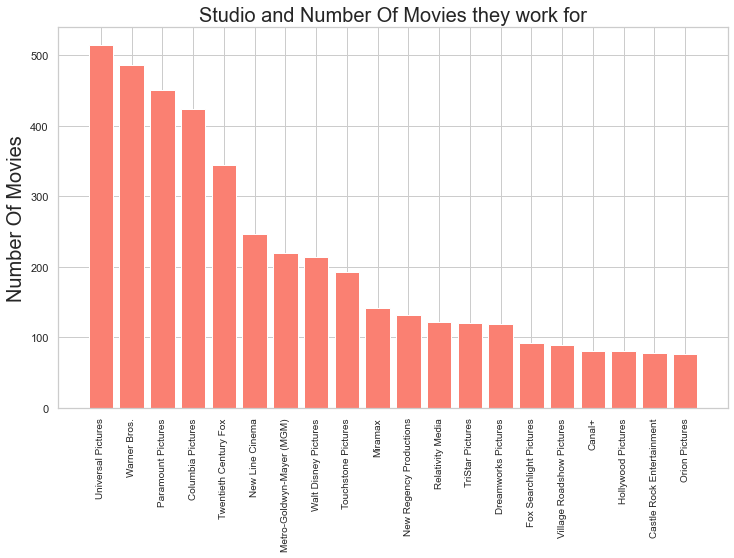

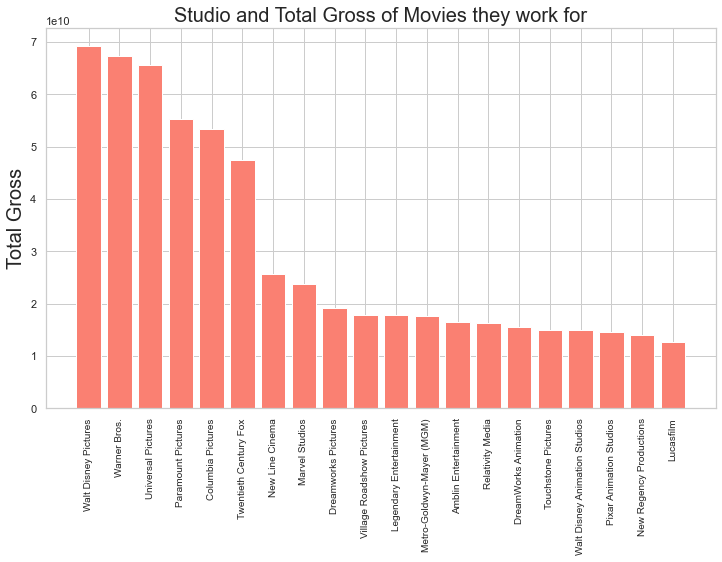

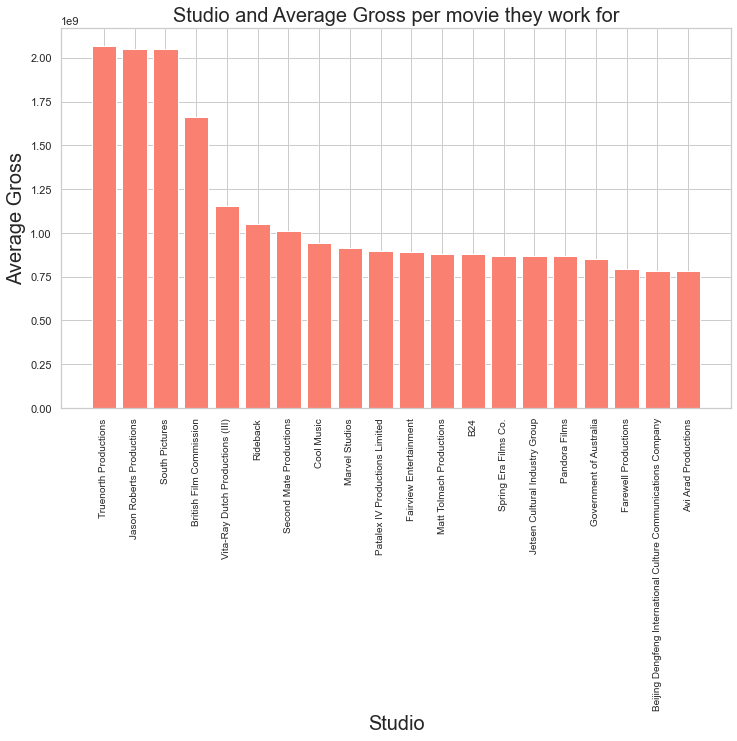

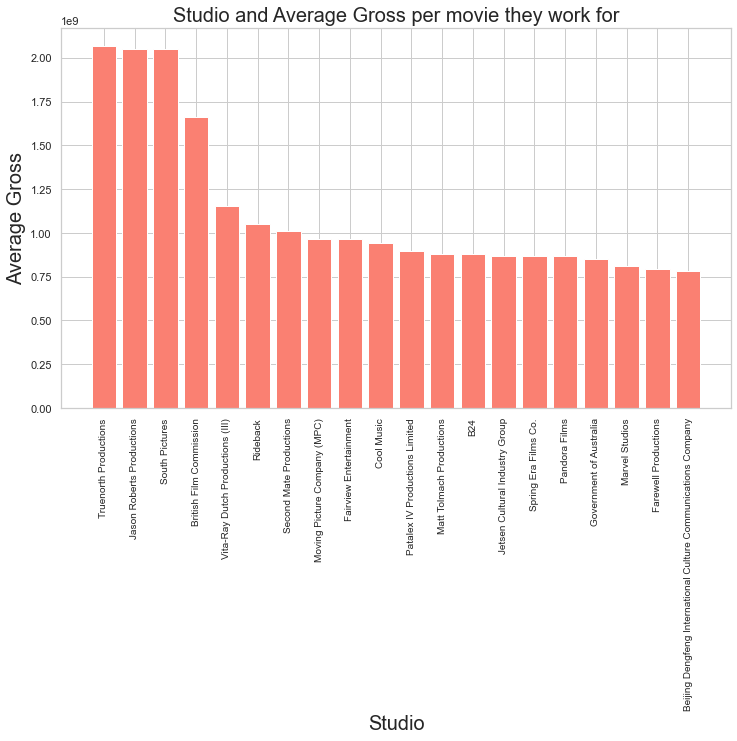

In [311]:
studio = parseWithMoneyAndCount(data, 'Studios')
fig = plt.figure(figsize=(12, 7))
# plt.subplot(2,1,1)
data2 = studio.sort_values(by='Count', ascending=False)[0:20]
plt.bar(data=data2, x='Studios', height='Count', color="salmon")
plt.xticks(rotation=90, fontsize=10)
plt.ylabel("Number Of Movies", fontsize=20)
plt.title("Studio and Number Of Movies they work for", fontsize=20)
plt.show()

fig = plt.figure(figsize=(12, 7))
# plt.subplot(2,1,1)
data2 = studio.sort_values(by='Total', ascending=False)[0:20]
plt.bar(data=data2, x='Studios', height='Total', color="salmon")
plt.xticks(rotation=90, fontsize=10)
plt.ylabel("Total Gross", fontsize=20)
plt.title("Studio and Total Gross of Movies they work for", fontsize=20)
plt.show()
# plt.subplot(2,1,2)
fig = plt.figure(figsize=(12, 7))
data3 = studio.sort_values(by='Mean', ascending=False)[0:20]
plt.bar(data=data3, x='Studios', height='Mean', color="salmon")
plt.xticks(rotation=90, fontsize=10)
plt.title("Studio and Average Gross per movie they work for", fontsize=20)
plt.xlabel("Studio", fontsize=20)
plt.ylabel("Average Gross", fontsize=20)
plt.show()

fig = plt.figure(figsize=(12, 7))
data3 = studio.sort_values(by='Median', ascending=False)[0:20]
plt.bar(data=data3, x='Studios', height='Median', color="salmon")
plt.xticks(rotation=90, fontsize=10)
plt.title("Studio and Average Gross per movie they work for", fontsize=20)
plt.xlabel("Studio", fontsize=20)
plt.ylabel("Average Gross", fontsize=20)
plt.show()

In [312]:
studio.sort_values(by='Mean', ascending=False)

,Studios,Total,Count,Mean,Median
6417,Truenorth Productions,2069521700,1,2.069522e+09,2.069522e+09
3434,Jason Roberts Productions,2048359754,1,2.048360e+09,2.048360e+09
5820,South Pictures,2048359754,1,2.048360e+09,2.048360e+09
1021,British Film Commission,1662899439,1,1.662899e+09,1.662899e+09
6616,Vita-Ray Dutch Productions (III),1153337496,1,1.153337e+09,1.153337e+09
...,...,...,...,...,...
4827,Paramount Famous Lasky Corporation,746,1,7.460000e+02,7.460000e+02
6659,Walter Wanger Productions,623,1,6.230000e+02,6.230000e+02
994,Break Media,528,1,5.280000e+02,5.280000e+02
1174,Campfire,528,1,5.280000e+02,5.280000e+02


This average gross plot for studio is not reliable to decide which Studio is big or not since there are some Studios which participate only in one Movie

We can define big studios by 4 ways:

- Number of movies releases
- Mean gross of movies they release
- Median gross of movies they release
- Total gross of movies they release 


Now we will exclude the Studio with releases lower than 10

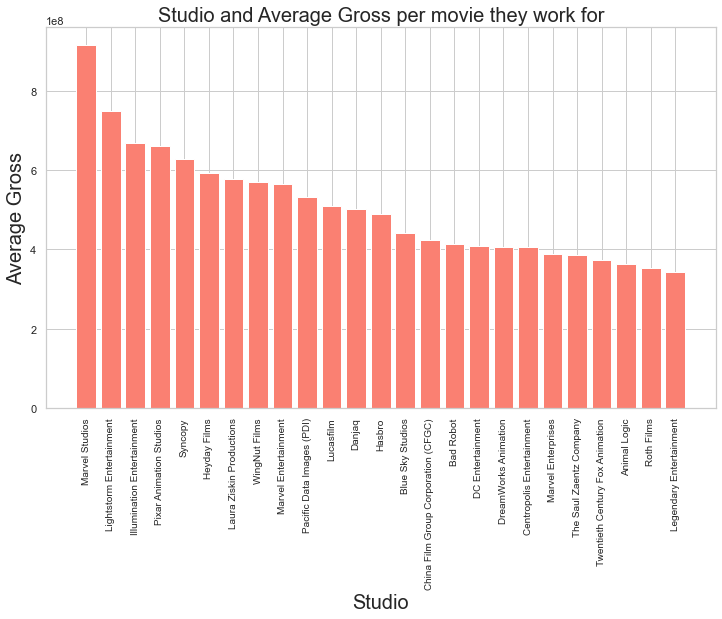

,Studios,Total,Count,Mean,Median
4117,Marvel Studios,23795322645,26,9.152047e+08,813667029.0
3830,Lightstorm Entertainment,6754939278,9,7.505488e+08,378882411.0
3226,Illumination Entertainment,6693236668,10,6.693237e+08,588661184.5
4979,Pixar Animation Studios,14528032320,22,6.603651e+08,601716911.5
6029,Syncopy,3775191007,6,6.291985e+08,597530912.5
...,...,...,...,...,...
6843,Zenith Entertainment,17321794,8,2.165224e+06,1708545.5
4453,National Film Board of Canada (NFB),14559833,7,2.079976e+06,1601612.0
4693,Ontario Film Development Corporation,8636461,6,1.439410e+06,1364006.0
3677,La Sept Cinéma,10915352,8,1.364419e+06,1229040.0


In [313]:
studios10Larger = studio[studio['Count'] > 5]
studios10Larger = studios10Larger.sort_values(by='Mean', ascending=False)
fig = plt.figure(figsize=(12, 7))
plt.bar(data=studios10Larger[0:25], x='Studios', height='Mean', color="salmon")
plt.xticks(rotation=90, fontsize=10)
plt.title("Studio and Average Gross per movie they work for", fontsize=20)
plt.xlabel("Studio", fontsize=20)
plt.ylabel("Average Gross", fontsize=20)
plt.show()
studios10Larger

The top studios bar chat now looks more familiar.

Move on to rank the Studios.

In [314]:
studios10Larger.sort_values(by='Mean', ascending=True, inplace=True)
studioRank = dict()
for i, row in enumerate(studios10Larger['Studios']):
    studioRank[row] = i + 1
studioRank

{'Concorde Pictures': 1,
 'La Sept Cinéma': 2,
 'Ontario Film Development Corporation': 3,
 'National Film Board of Canada (NFB)': 4,
 'Zenith Entertainment': 5,
 'Duplass Brothers Productions': 6,
 'A&E IndieFilms': 7,
 'British Screen Productions': 8,
 'RAI Radiotelevisione Italiana': 9,
 'American Playhouse': 10,
 'Films A2': 11,
 'Sovereign Pictures': 12,
 'Lorimar Motion Pictures': 13,
 'Arte France Cinéma': 14,
 'Diamond Docs': 15,
 'MK2 Productions': 16,
 'Arts Council of England': 17,
 'Road Movies Filmproduktion': 18,
 'The Rank Organisation': 19,
 'October Films': 20,
 'Alliance Communications Corporation': 21,
 'Live Entertainment': 22,
 'Les Films Ariane': 23,
 'Trimark Pictures': 24,
 'Triumph Films': 25,
 'CBS Theatrical Films': 26,
 'Big Indie Pictures': 27,
 'Alliance Entertainment': 28,
 'Fine Line Features': 29,
 'Cineplex Odeon Films': 30,
 'Les Films Alain Sarde': 31,
 'Gener8Xion Entertainment': 32,
 'Téléfilm Canada': 33,
 'Rhombus Media': 34,
 'Canadian Film Deve

Apply by get the max rank in the list of Studios for each movie

The studio not appear in the list will be randomly choose rank between **0** and **200**

Pearsons correlation between StudioRank and Gross: 0.392


<AxesSubplot:xlabel='StudioRank', ylabel='Gross_worldwide'>

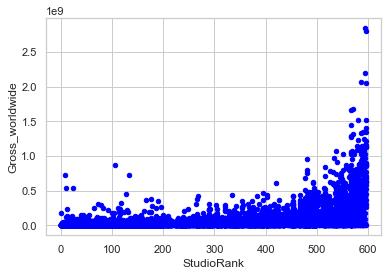

In [315]:
import random


def getStudioRank(studios):
    max = 0
    for studio in studios:
        if studio not in studioRank.keys():
            continue
        if studioRank[studio] > max:
            max = studioRank[studio]
    if max != 0:
        return max
    return random.randint(1, 200)


data2 = data.copy()
data2['StudioRank'] = data2['Studios'].apply(getStudioRank)
corr = pearsonr(data2['StudioRank'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between StudioRank and Gross: %.3f' % corr)
data2.plot.scatter(x='StudioRank', y='Gross_worldwide', color='blue')

Apply by get the total rank in the list of Studios for each movie

The studio not appear in the list will be randomly choose rank between **0** and **200**

Pearsons correlation between StudioRank and Gross: 0.473


<AxesSubplot:xlabel='StudioRank', ylabel='Gross_worldwide'>

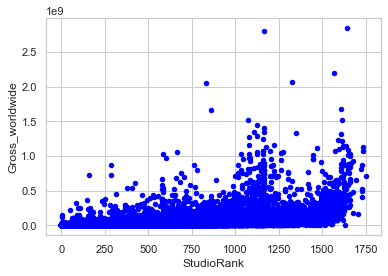

In [316]:
import random


def getStudioRank(studios):
    total = 0
    for studio in studios:
        if studio not in studioRank.keys():
            total += random.randint(1, 200)
            continue
        total += studioRank[studio]
    return total


data2 = data.copy()
data2['StudioRank'] = data2['Studios'].apply(getStudioRank)
corr = pearsonr(data2['StudioRank'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between StudioRank and Gross: %.3f' % corr)
data2.plot.scatter(x='StudioRank', y='Gross_worldwide', color='blue')

In [317]:
final['StudioRank'] = data2['StudioRank']

Apply by get the mean rank in the list of Studios for each movie

The studio not appear in the list will be randomly choose rank between **0** and **200**

Pearsons correlation between StudioRank and Gross: 0.433


<AxesSubplot:xlabel='StudioRank', ylabel='Gross_worldwide'>

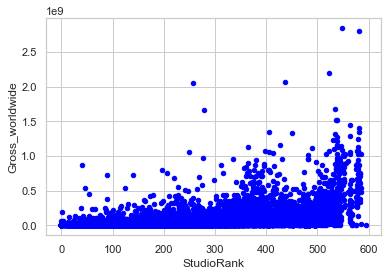

In [318]:
import random


def getStudioRank(studios):
    total = 0
    length = len(studios)
    if length == 0:
        length = 1
    for studio in studios:
        if studio not in studioRank.keys():
            total += random.randint(0, 200)
            continue
        total += studioRank[studio]
    return total / length


data2 = data.copy()
data2['StudioRank'] = data2['Studios'].apply(getStudioRank)
corr = pearsonr(data2['StudioRank'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between StudioRank and Gross: %.3f' % corr)
data2.plot.scatter(x='StudioRank', y='Gross_worldwide', color='blue')

Decide to choose **total rank**

Now we will extract more feature That is:
- Number of top studios(Studio that in the top **100**)
- Boolean (0,1) Have studio in high top (In top **30**)

NumTopStudios

In [319]:
studios10Larger.sort_values(by='Mean', ascending=False, inplace=True)
top100Studios = list(studios10Larger['Studios'][0:100])


def getNumTopStudios(studios):
    total = 0
    for studio in studios:
        if studio in top100Studios:
            total += 1
    return total


data2 = data.copy()
data2['NumTopStudios'] = data2['Studios'].apply(getNumTopStudios)
data2['NumTopStudios'].value_counts()

0    7009
1    1248
2     433
3      62
Name: NumTopStudios, dtype: int64

Pearsons correlation between NumTopStudios and Gross: 0.530


<AxesSubplot:xlabel='NumTopStudios', ylabel='Gross_worldwide'>

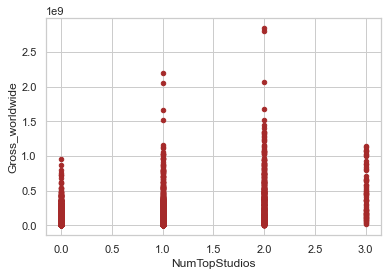

In [320]:
corr = pearsonr(data2['NumTopStudios'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between NumTopStudios and Gross: %.3f' % corr)
data2.plot.scatter(x='NumTopStudios', y='Gross_worldwide', color='brown')

In [321]:
final['NumTopStudios'] = data2['NumTopStudios']

HasTopStudio

Pearsons correlation between HasTopStudio and Gross: 0.504


<AxesSubplot:xlabel='HasTopStudio', ylabel='Gross_worldwide'>

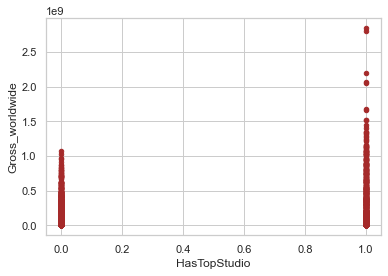

In [322]:
studios10Larger.sort_values(by='Mean', ascending=False, inplace=True)
top100Studios = list(studios10Larger['Studios'][0:30])


def getHasTopStudio(studios):
    for studio in studios:
        if studio in top100Studios:
            return 1
    return 0


data2 = data.copy()
data2['HasTopStudio'] = data2['Studios'].apply(getHasTopStudio)
data2['HasTopStudio'].value_counts()
corr = pearsonr(data2['HasTopStudio'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between HasTopStudio and Gross: %.3f' % corr)
data2.plot.scatter(x='HasTopStudio', y='Gross_worldwide', color='brown')

In [323]:
final['HasTopStudio'] = data2['HasTopStudio']

## Production Countries Analysis



Hypothesis: Is gross depend on number of Production Companies in each movie?

In [324]:
data2 = data.copy()
data2['Countries'] = data2['Countries'].apply(lambda x: len(x))
data2['Countries'].value_counts()

1     5743
2     1873
3      676
4      269
5      114
6       45
7       10
8       10
0        5
9        4
11       2
19       1
Name: Countries, dtype: int64

Pearsons correlation between Countries and Gross: 0.087


<AxesSubplot:xlabel='Countries', ylabel='Gross_worldwide'>

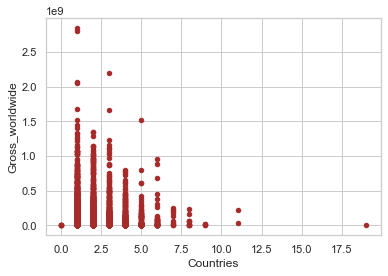

In [325]:
corr = pearsonr(data2['Countries'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between Countries and Gross: %.3f' % corr)
data2.plot.scatter(x='Countries', y='Gross_worldwide', color='brown')

Very low correlation of **0.079**

Gross of each countries and Total Gross
* Have not devide gross to each Country if they coop together

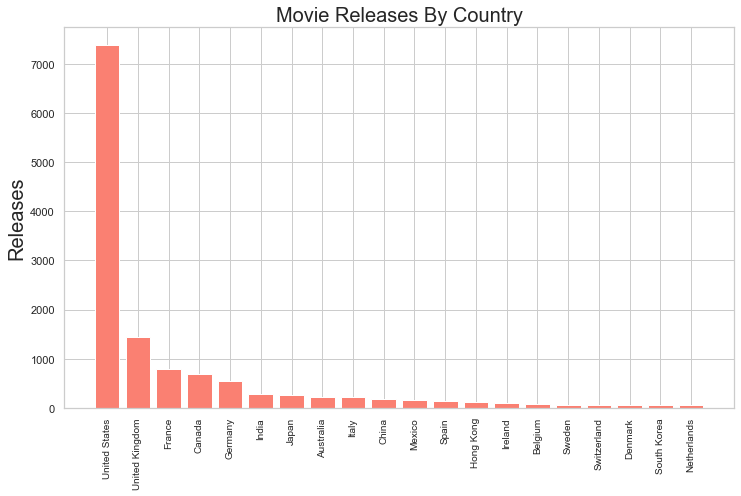

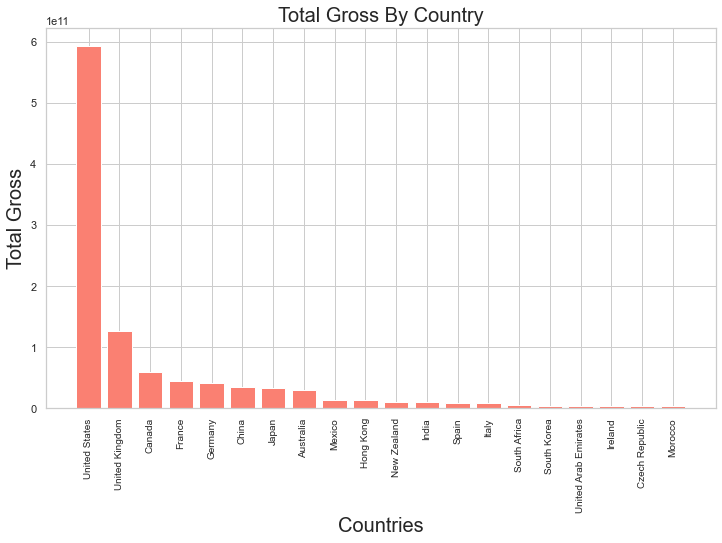

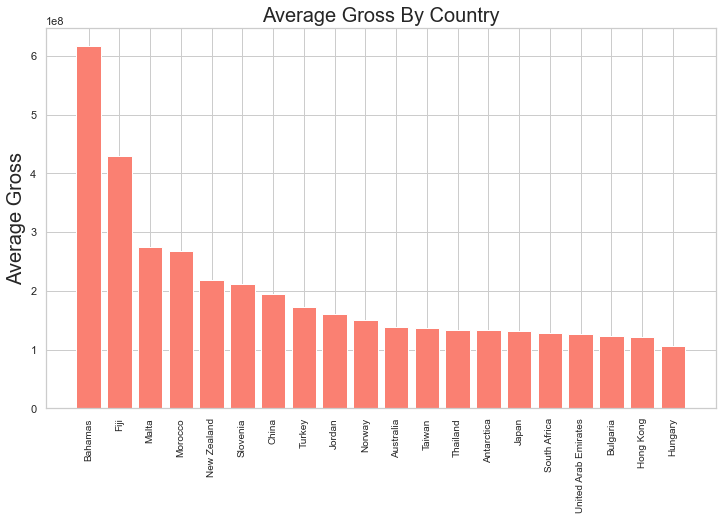

In [326]:
country = parseWithMoneyAndCount(data, 'Countries')
# country=country[country['Count']>20]
fig = plt.figure(figsize=(12, 7))
# plt.subplot(2,1,1)
data2 = country.sort_values(by='Count', ascending=False)[0:20]
plt.bar(data=data2, x='Countries', height='Count', color="salmon")
plt.xticks(rotation=90, fontsize=10)
plt.ylabel("Releases", fontsize=20)
plt.title("Movie Releases By Country", fontsize=20)
fig = plt.figure(figsize=(12, 7))
# plt.subplot(2,1,2)
data2 = country.sort_values(by='Total', ascending=False)[0:20]
plt.bar(data=data2, x='Countries', height='Total', color="salmon")
plt.ylabel("Total Gross", fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Countries", fontsize=20)
plt.title("Total Gross By Country", fontsize=20)

fig = plt.figure(figsize=(12, 7))
# plt.subplot(2,1,1)
data2 = country.sort_values(by='Mean', ascending=False)[0:20]
plt.bar(data=data2, x='Countries', height='Mean', color="salmon")
plt.xticks(rotation=90, fontsize=10)
plt.ylabel("Average Gross", fontsize=20)
plt.title("Average Gross By Country", fontsize=20)
plt.show()
## This use for QUESTION 8
list_country = list(country['Countries'])

This rank of average gross is not relevant since there are some countries with only least release count

In [327]:
country.sort_values(by='Mean', ascending=False)

,Countries,Total,Count,Mean,Median
6,Bahamas,616502912,1,6.165029e+08,616502912.0
32,Fiji,429632142,1,4.296321e+08,429632142.0
62,Malta,3027543520,11,2.752312e+08,240697856.0
67,Morocco,3758242989,14,2.684459e+08,151314187.0
72,New Zealand,10467742795,48,2.180780e+08,74271180.0
...,...,...,...,...,...
10,Bhutan,1792370,2,8.961850e+05,896185.0
93,Soviet Union,2311743,3,7.705810e+05,93292.0
35,Georgia,686704,1,6.867040e+05,686704.0
58,Liberia,555533,1,5.555330e+05,555533.0


<AxesSubplot:xlabel='Countries'>

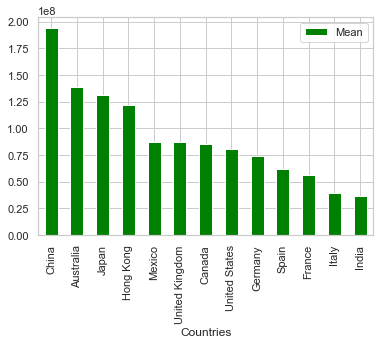

In [328]:
country.sort_values(by='Mean', ascending=False)
release100Countries = country[country['Count'] >= 100]
release100Countries = release100Countries.sort_values(by='Mean', ascending=False)
release100Countries.plot.bar(x='Countries', y='Mean', color='green')

We will choose these list of Countries to extract a rank feature

In [329]:
release100Countries = release100Countries.sort_values(by='Mean', ascending=True).reset_index(drop=True)
countryRank = dict()
for i, row in enumerate(release100Countries['Countries']):
    countryRank[row] = i + 1  ## Plus 1 in order to release the 0 position for another film
countryRank

{'India': 1,
 'Italy': 2,
 'France': 3,
 'Spain': 4,
 'Germany': 5,
 'United States': 6,
 'Canada': 7,
 'United Kingdom': 8,
 'Mexico': 9,
 'Hong Kong': 10,
 'Japan': 11,
 'Australia': 12,
 'China': 13}

Get rank by the maximum

Pearsons correlation between CountryRank and Gross: 0.155


<AxesSubplot:xlabel='CountryRank', ylabel='Gross_worldwide'>

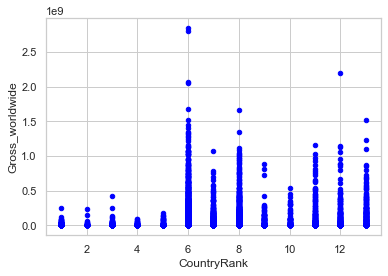

In [330]:
def getCountryRank(countries):
    max = 0
    for country in countries:
        if country not in countryRank.keys():
            continue
        if countryRank[country] > max:
            max = countryRank[country]
    if max == 0:
        max = random.randint(1, 10)
    return max


data2 = data.copy()
data2['CountryRank'] = data2['Countries'].apply(getCountryRank)
corr = pearsonr(data2['CountryRank'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between CountryRank and Gross: %.3f' % corr)
data2.plot.scatter(x='CountryRank', y='Gross_worldwide', color='blue')

In [331]:
final['CountryRank'] = data2['CountryRank']

By total

Pearsons correlation between CountryRank and Gross: 0.161


<AxesSubplot:xlabel='CountryRank', ylabel='Gross_worldwide'>

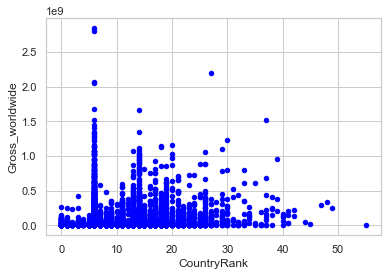

In [332]:
def getCountryRank(countries):
    total = 0
    for country in countries:
        if country not in countryRank.keys():
            continue
        total += countryRank[country]
    return total


data2 = data.copy()
data2['CountryRank'] = data2['Countries'].apply(getCountryRank)
corr = pearsonr(data2['CountryRank'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between CountryRank and Gross: %.3f' % corr)
data2.plot.scatter(x='CountryRank', y='Gross_worldwide', color='blue')

By in the list

Pearsons correlation between CountryRank and Gross: 0.034


<AxesSubplot:xlabel='CountryRank', ylabel='Gross_worldwide'>

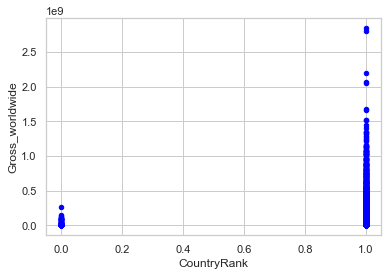

In [333]:
def getCountryRank(countries):
    for country in countries:
        if country not in countryRank.keys():
            continue
        return 1
    return 0


data2 = data.copy()
data2['CountryRank'] = data2['Countries'].apply(getCountryRank)
corr = pearsonr(data2['CountryRank'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between CountryRank and Gross: %.3f' % corr)
data2.plot.scatter(x='CountryRank', y='Gross_worldwide', color='blue')

## Language analysis


How distribution release by Languague

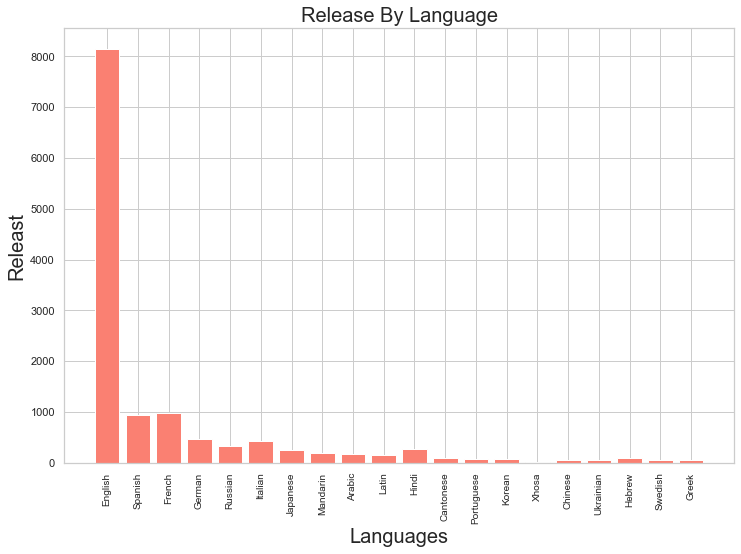

In [334]:
language = parseWithMoneyAndCount(data, 'Languages')
data2 = language.sort_values(by='Total', ascending=False)[0:20]

fig = plt.figure(figsize=(12, 8))
plt.bar(data=data2, x='Languages', height='Count', color="salmon")
plt.ylabel("Releast", fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Languages", fontsize=20)
plt.title("Release By Language", fontsize=20)
plt.show()

Nowadays, films almost have English. We will try to find that what is the film is spoken in English or another languages

In [335]:
data2 = data.copy()
data2['IsEnglish'] = data2['Languages'].apply(lambda x: 1 if 'English' in x else 0)
data2['IsEnglish'].value_counts()

1    8150
0     602
Name: IsEnglish, dtype: int64

Pearsons correlation between IsEnnglish and Gross: 0.076


<AxesSubplot:xlabel='IsEnglish', ylabel='Gross_worldwide'>

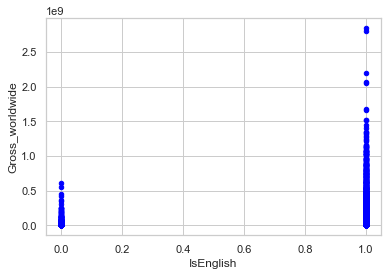

In [336]:
corr = pearsonr(data2['IsEnglish'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between IsEnnglish and Gross: %.3f' % corr)
data2.plot.scatter(x='IsEnglish', y='Gross_worldwide', color='blue')

Not very relevant with correlation of 0.037

## Keywords analysis

Hypothesis: Is gross depend on number of keywords?

In [337]:
data2 = data.copy()
data2['NumKeywords'] = data2['Keywords'].apply(lambda x: len(x))
data2['NumKeywords'].value_counts()

5    8566
1      89
2      34
4      24
3      21
0      18
Name: NumKeywords, dtype: int64

Pearsons correlation between NumKeywords and Gross: 0.043


<AxesSubplot:xlabel='NumKeywords', ylabel='Gross_worldwide'>

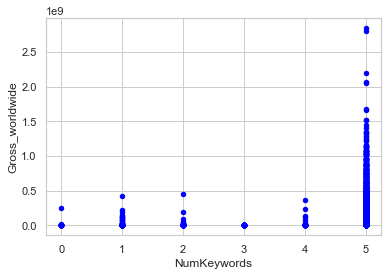

In [338]:
corr = pearsonr(data2['NumKeywords'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between NumKeywords and Gross: %.3f' % corr)
data2.plot.scatter(x='NumKeywords', y='Gross_worldwide', color='blue')

Not relevant

How distribution of gross by Keywords

Text(0, 0.5, 'Count')

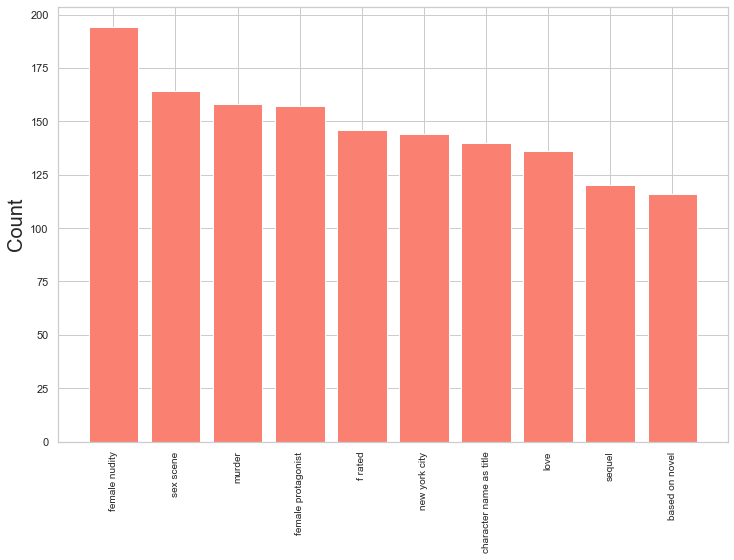

In [339]:
keyword = parseWithMoneyAndCount(data, 'Keywords')
fig = plt.figure(figsize=(12, 8))
data2 = keyword.sort_values(by='Count', ascending=False)[0:10]
plt.bar(data=data2, x='Keywords', height='Count', color="salmon")
plt.xticks(rotation=90, fontsize=10)
plt.ylabel("Count", fontsize=20)

In [340]:
keyword.sort_values(by='Mean', ascending=False)[0:10]

,Keywords,Total,Count,Mean,Median
4833,forest protection,2847246203,1,2.847246e+09,2.847246e+09
2911,cosmic,2797501328,1,2.797501e+09,2.797501e+09
7144,love affair,2201647264,1,2.201647e+09,2.201647e+09
10605,sailor's death,2201647264,1,2.201647e+09,2.201647e+09
11980,sunken ship,2201647264,1,2.201647e+09,2.201647e+09
10649,sanitation employee,2069521700,1,2.069522e+09,2.069522e+09
3314,death of recurring character,2048359754,1,2.048360e+09,2.048360e+09
10574,s.h.i.e.l.d.,1518815515,1,1.518816e+09,1.518816e+09
2063,car falling off a cliff,1515341399,1,1.515341e+09,1.515341e+09
3521,disney animated sequel,1450026933,1,1.450027e+09,1.450027e+09


In [341]:
keyword.sort_values(by='Median', ascending=False)[0:10]

,Keywords,Total,Count,Mean,Median
4833,forest protection,2847246203,1,2.847246e+09,2.847246e+09
2911,cosmic,2797501328,1,2.797501e+09,2.797501e+09
7144,love affair,2201647264,1,2.201647e+09,2.201647e+09
11980,sunken ship,2201647264,1,2.201647e+09,2.201647e+09
10605,sailor's death,2201647264,1,2.201647e+09,2.201647e+09
10649,sanitation employee,2069521700,1,2.069522e+09,2.069522e+09
3314,death of recurring character,2048359754,1,2.048360e+09,2.048360e+09
10574,s.h.i.e.l.d.,1518815515,1,1.518816e+09,1.518816e+09
2063,car falling off a cliff,1515341399,1,1.515341e+09,1.515341e+09
3521,disney animated sequel,1450026933,1,1.450027e+09,1.450027e+09


These keywords have high mean and median except the truth that have only 1 count

In [342]:
count50Keywords = keyword[keyword['Count'] > 20]
count50Keywords.sort_values(by='Mean', ascending=False)

,Keywords,Total,Count,Mean,Median
11995,superhero,32041168607,61,5.252651e+08,370569774.0
1120,based on comic book,10474265400,25,4.189706e+08,230884728.0
7217,magic,10738490415,36,2.982914e+08,111927462.0
9413,princess,6618049857,25,2.647220e+08,55534455.0
6675,king,7831973626,30,2.610658e+08,57671894.0
...,...,...,...,...,...
8615,one word title,1203447244,68,1.769775e+07,6258238.5
12603,topless female nudity,609853613,37,1.648253e+07,3039587.0
7275,male full frontal nudity,434996581,30,1.449989e+07,3005289.5
5839,homosexual,361636313,35,1.033247e+07,5526675.0


<AxesSubplot:xlabel='Keywords'>

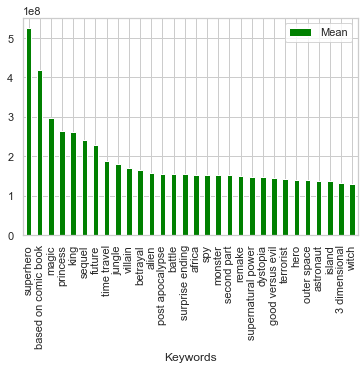

In [343]:
count50Keywords.sort_values(by='Mean', ascending=False)[0:30].plot.bar(x='Keywords', y='Mean', color='green')

**superhero** keywords is popular in the 2010s and have high average gross

Rank keywords

In [344]:
count50Keywords = count50Keywords.sort_values(by='Mean', ascending=True).reset_index(drop=True)
keywordRank = dict()
for i, row in enumerate(count50Keywords['Keywords']):
    keywordRank[row] = i + 1  ## Plus 1 in order to release the 0 position for another film
keywordRank

{'independent film': 1,
 'homosexual': 2,
 'male full frontal nudity': 3,
 'topless female nudity': 4,
 'one word title': 5,
 'scene during opening credits': 6,
 'timeframe 1990s': 7,
 'lust': 8,
 'title directed by female': 9,
 'female frontal nudity': 10,
 'three word title': 11,
 'infidelity': 12,
 'written by director': 13,
 'male frontal nudity': 14,
 'student': 15,
 'african american': 16,
 'bare breasts': 17,
 'lesbian': 18,
 'hood': 19,
 'bar': 20,
 'actor': 21,
 'breasts': 22,
 'two word title': 23,
 'vietnam war veteran': 24,
 'restaurant': 25,
 'secret': 26,
 'gay': 27,
 'watching tv': 28,
 'coming of age': 29,
 'slasher': 30,
 'obsession': 31,
 'widow': 32,
 '1950s': 33,
 'period drama': 34,
 'public nudity': 35,
 'panties': 36,
 'satire': 37,
 'woman on top': 38,
 'jewish': 39,
 'male rear nudity': 40,
 'looking at oneself in a mirror': 41,
 'money': 42,
 'f rated': 43,
 'surrealism': 44,
 'aerial camera shot': 45,
 'lesbian kiss': 46,
 'character name as title': 47,
 'tea

Get rank for keywords by maximum

Default max rank = 0

Pearsons correlation between keywordRank and Gross: 0.162


<AxesSubplot:xlabel='keywordRank', ylabel='Gross_worldwide'>

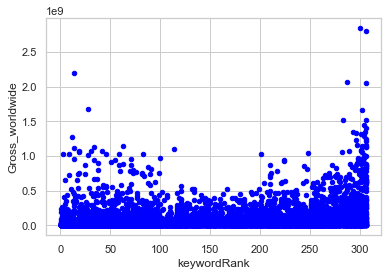

In [345]:
import random


def getKeywordsRank(keywords):
    max = 0
    for keyword in keywords:
        if keyword not in keywordRank.keys():
            continue
        if keywordRank[keyword] > max:
            max = keywordRank[keyword]
    if max == 0:
        max = random.randint(1, 100)
    return max


data2 = data.copy()
data2['keywordRank'] = data2['Keywords'].apply(getKeywordsRank)
corr = pearsonr(data2['keywordRank'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between keywordRank and Gross: %.3f' % corr)
data2.plot.scatter(x='keywordRank', y='Gross_worldwide', color='blue')

Pearsons correlation between keywordRank and Gross: 0.160


<AxesSubplot:xlabel='keywordRank', ylabel='Gross_worldwide'>

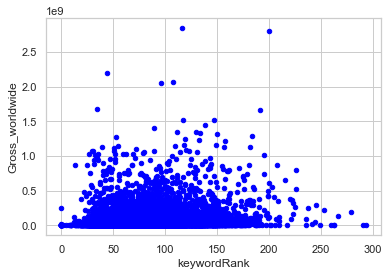

In [346]:
import random


def getKeywordsRank(keywords):
    total = 0
    length = len(keywords)
    if length == 0:
        length = 1
    for keyword in keywords:
        if keyword not in keywordRank.keys():
            total += random.randint(1, 100)
            continue
        total += keywordRank[keyword]
    return total / length


data2 = data.copy()
data2['keywordRank'] = data2['Keywords'].apply(getKeywordsRank)
corr = pearsonr(data2['keywordRank'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between keywordRank and Gross: %.3f' % corr)
data2.plot.scatter(x='keywordRank', y='Gross_worldwide', color='blue')

In [347]:
final['keywordRank'] = data2['keywordRank']

## MPAA Analysis

How distribution of gross by MPAA Certificate

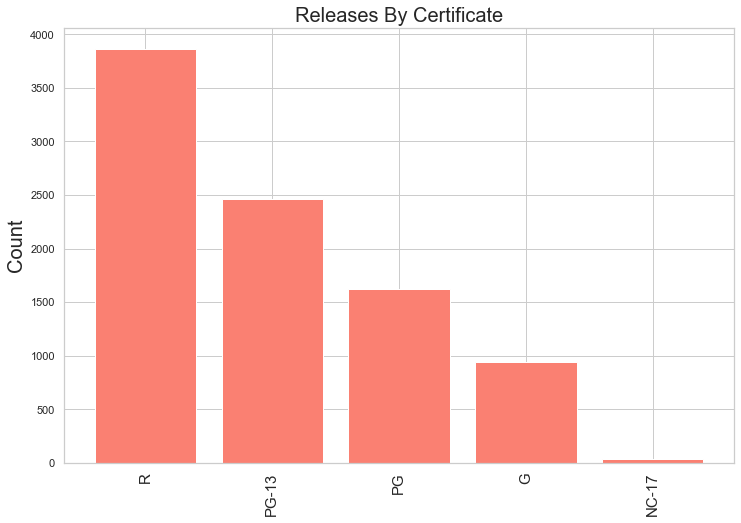

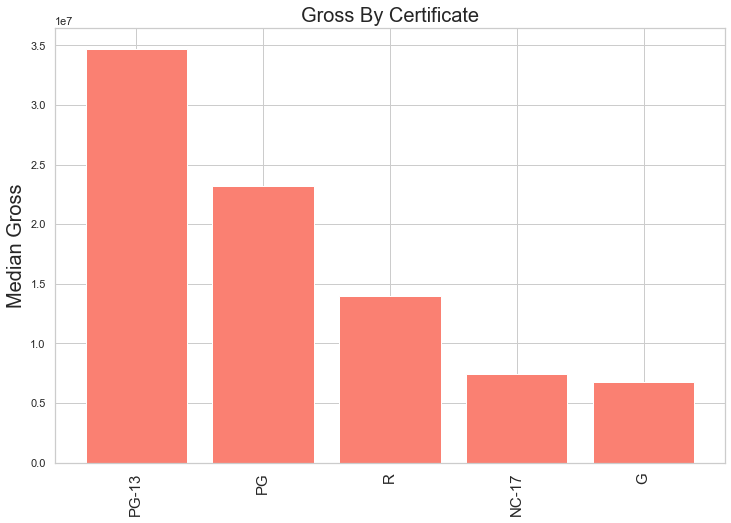

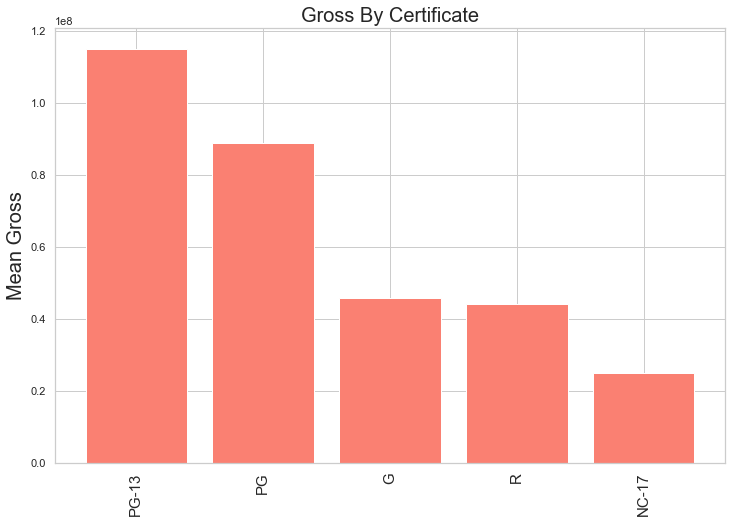

In [348]:
certificate = parseWithMoneyAndCount(data, 'ListOfCertificate')
fig = plt.figure(figsize=(12, 8))
data2 = certificate.sort_values(by='Count', ascending=False)
plt.bar(data=data2, x='ListOfCertificate', height='Count', color="salmon")
plt.xticks(rotation=90, fontsize=15)
plt.ylabel("Count", fontsize=20)
plt.title("Releases By Certificate", fontsize=20)
plt.show()
fig = plt.figure(figsize=(12, 8))
data2 = certificate.sort_values(by='Median', ascending=False)
plt.bar(data=data2, x='ListOfCertificate', height='Median', color="salmon")
plt.xticks(rotation=90, fontsize=15)
plt.ylabel("Median Gross", fontsize=20)
plt.title("Gross By Certificate", fontsize=20)
plt.show()
fig = plt.figure(figsize=(12, 8))
data2 = certificate.sort_values(by='Mean', ascending=False)
plt.bar(data=data2, x='ListOfCertificate', height='Mean', color="salmon")
plt.xticks(rotation=90, fontsize=15)
plt.ylabel("Mean Gross", fontsize=20)
plt.title("Gross By Certificate", fontsize=20)
plt.show()

NC-17 has the least numbers of release

PG-13 and G has higher mean and medians gross
R and NC-27 has low mean and median gross
This is understandable since R and NC-27 will reduces the age can watch the film. Hence lower!

In [349]:
certificate

,ListOfCertificate,Total,Count,Mean,Median
0,G,42824185750,937,4.570351e+07,6780490.0
1,NC-17,925845011,37,2.502284e+07,7412216.0
2,PG,144055409565,1621,8.886824e+07,23237911.0
3,PG-13,283553468080,2466,1.149852e+08,34714400.0
4,R,170006305715,3867,4.396336e+07,14000000.0


Conduct rank by Certificate

By Mean

In [350]:
certificate = certificate.sort_values(by='Mean', ascending=True).reset_index(drop=True)
cerRank = dict()
for i, row in enumerate(certificate['ListOfCertificate']):
    cerRank[row] = i + 1
cerRank

{'NC-17': 1, 'R': 2, 'G': 3, 'PG': 4, 'PG-13': 5}

Pearsons correlation between cerRank and Gross: 0.199


<AxesSubplot:xlabel='cerRank', ylabel='Gross_worldwide'>

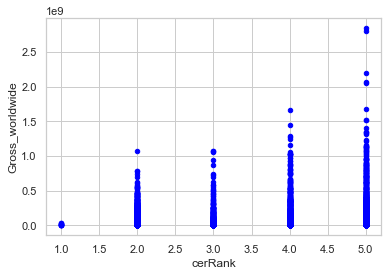

In [351]:
def getCerRank(cers):
    max = 0
    for cer in cers:
        if cer not in cerRank.keys():
            continue
        if cerRank[cer] > max:
            max = cerRank[cer]
    return max


data2 = data.copy()
data2['cerRank'] = data2['ListOfCertificate'].apply(getCerRank)
corr = pearsonr(data2['cerRank'], data2['Gross_worldwide'])[0]
print('Pearsons correlation between cerRank and Gross: %.3f' % corr)
data2.plot.scatter(x='cerRank', y='Gross_worldwide', color='blue')

In [352]:
final['cerRank'] = data2['cerRank']

In [353]:
final.to_csv('../dataset/extracted/feature_extracted.csv', index=False)